# 1-Traitement du texte

In [1]:
# Import des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re  # For preprocessing
import multiprocessing

# Tokenizer
from nltk.tokenize import sent_tokenize, word_tokenize

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('words')

nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\multi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\multi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\multi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\multi\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\multi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Récupération du dataset et filtres de données

In [2]:
path = 'C:/Users/multi/Desktop/Projets_DS/P6_ds/Flipkart/'
data1 = pd.read_csv(path + "flipkart_com-ecommerce_sample_1050.csv")
print(data1.shape)

(1050, 15)


In [3]:
pd.set_option("max_colwidth", None)

In [4]:
df = data1.copy()

echantillon_col = []
for column in df:
    list_col = str(list(df[column].head(1)))
    echantillon_col.append(list_col)

count = []
for column in df:
    comptage = len(df[column].unique())
    count.append(comptage)

d = {'% manquants':(df.isna().sum()/len(df) * 100) ,'type':list(df.dtypes),'unique':count,'échantillon des 1 premieres valeurs ':echantillon_col}
ColonnesTypes = pd.DataFrame(data=d)
pd.options.display.max_rows = 81
ColonnesTypes.sort_values(by=['% manquants'],ascending = True)

% manquants     type  unique  \
uniq_id                     0.000000   object    1050   
crawl_timestamp             0.000000   object     149   
product_url                 0.000000   object    1050   
product_name                0.000000   object    1050   
product_category_tree       0.000000   object     642   
pid                         0.000000   object    1050   
image                       0.000000   object    1050   
is_FK_Advantage_product     0.000000     bool       2   
description                 0.000000   object    1050   
product_rating              0.000000   object      27   
overall_rating              0.000000   object      27   
retail_price                0.095238  float64     355   
discounted_price            0.095238  float64     425   
product_specifications      0.095238   object     985   
brand                      32.190476   object     491   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     échantillon des 1 premieres valeurs   
uniq_id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              ['55b85ea15a1536d46b7190ad6fff8ce7']  
crawl_timestamp                                                                                                                                                                                                 

### Des 15 variables disponibles nous n’en conserverons que 4.

In [5]:
data1 = data1[['uniq_id','product_category_tree','image','description']]

### Filtre des categories en ne concervant que la categorie "primaire" du produit pour la variable 'product_category_tree'

In [6]:
data1['product_category_tree'] = data1['product_category_tree'].str.split(r' >>', expand=True)[0]
data1['product_category_tree'] = data1['product_category_tree'].str.split(r"[", expand=True)[1]
data1['product_category_tree'] = data1['product_category_tree'].str.split(r'"', expand=True)[1]
data1[['product_category_tree']]

product_category_tree
0          Home Furnishing
1                Baby Care
2                Baby Care
3          Home Furnishing
4          Home Furnishing
...                    ...
1045             Baby Care
1046             Baby Care
1047             Baby Care
1048             Baby Care
1049             Baby Care

[1050 rows x 1 columns]

In [7]:
data1['product_category_tree'].value_counts()

Home Furnishing               150
Baby Care                     150
Watches                       150
Home Decor & Festive Needs    150
Kitchen & Dining              150
Beauty and Personal Care      150
Computers                     150
Name: product_category_tree, dtype: int64

In [8]:
df = data1.copy()

echantillon_col = []
for column in df:
    list_col = str(list(df[column].head(1)))
    echantillon_col.append(list_col)

count = []
for column in df:
    comptage = len(df[column].unique())
    count.append(comptage)

d = {'% manquants':(df.isna().sum()/len(df) * 100) ,'type':list(df.dtypes),'unique':count,'échantillon des 1 premieres valeurs ':echantillon_col}
ColonnesTypes = pd.DataFrame(data=d)
pd.options.display.max_rows = 81
ColonnesTypes.sort_values(by=['% manquants'],ascending = True)

% manquants    type  unique  \
uniq_id                        0.0  object    1050   
product_category_tree          0.0  object       7   
image                          0.0  object    1050   
description                    0.0  object    1050   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   échantillon des 1 premieres valeurs   
uniq_id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            ['55b85ea15a1536d46b7190ad6fff8ce7']  
product_category_tree                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

## Prétraitement du texte

In [9]:
def tokenizer_fct(sentence) :
    # print(sentence)
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

# Stop words
from nltk.corpus import stopwords
stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')']

def stop_word_filter_fct(list_words) :
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

# lower case et alpha
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words ]
#    lw = [re.sub("[^A-Za-z']+", ' ', str(w)).lower() for w in list_words] #Removes non-alphabetic characters:
    return lw

# Lemmatizer (base d'un mot)
from nltk.stem import WordNetLemmatizer

def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)
def transform_bow_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
#    lem_w = lemma_fct(lw) 
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text

# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
#    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

In [10]:
# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)
# Tokenizer # Stop words # lower case et alpha #lemmatizer
data1['sentence_bow'] = data1['description'].apply(lambda x : transform_bow_fct(x))
data1['sentence_bow_lem'] = data1['description'].apply(lambda x : transform_bow_lem_fct(x))
data1['sentence_dl'] = data1['description'].apply(lambda x : transform_dl_fct(x))

In [11]:
temp = data1[['uniq_id','product_category_tree','image']].copy()
temp.to_csv("temp1050.csv")

## Préparation commune des traitements

In [12]:
# Import des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import pickle
import time
from sklearn import cluster, metrics
from sklearn import manifold, decomposition
import logging

logging.disable(logging.WARNING) # disable WARNING, INFO and DEBUG logging everywhere


In [13]:
data1.shape

(1050, 7)

In [14]:
l_cat = list(set(data1['product_category_tree']))
print("catégories : ", l_cat)

catégories :  ['Beauty and Personal Care', 'Watches', 'Kitchen & Dining', 'Baby Care', 'Computers', 'Home Decor & Festive Needs', 'Home Furnishing']


In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(l_cat)

LabelEncoder()

#### Les 7 categories

In [16]:
le.classes_

array(['Baby Care', 'Beauty and Personal Care', 'Computers',
       'Home Decor & Festive Needs', 'Home Furnishing',
       'Kitchen & Dining', 'Watches'], dtype='<U26')

In [17]:
y_cat_num = le.transform(data1['product_category_tree'])

In [18]:
y_cat_num

array([4, 0, 0, ..., 0, 0, 0])

In [19]:
from nltk.tokenize import sent_tokenize, word_tokenize

data1['length_bow'] = data1['sentence_bow'].apply(lambda x : len(word_tokenize(x)))
print("max length bow : ", data1['length_bow'].max())
data1['lenght_bow_lem'] = data1['sentence_bow_lem'].apply(lambda x : len(word_tokenize(x)))
print("max length bow lem : ", data1['lenght_bow_lem'].max())
data1['length_dl'] = data1['sentence_dl'].apply(lambda x : len(word_tokenize(x)))
print("max length dl : ", data1['length_dl'].max())

max length bow :  379
max length bow lem :  379
max length dl :  632


## Fonctions communes

In [20]:
import time

# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
def ARI_fct(features) :
    time1 = time.time()
    num_labels=len(l_cat)
    tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne 
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_


# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) :
    fig = plt.figure(figsize=(20,8))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Categorie")
    plt.title('Représentation des produits par catégories réelles')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Représentation des produits par clusters')
    
    plt.show()
    print("ARI : ", ARI)

# Bag of word - Tf-idf

## Préparation sentences

In [21]:
# création du bag of words (CountVectorizer et Tf-idf)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'sentence_bow'

cv_transform = cvect.fit_transform(data1[feat])  
ctf_transform = ctf.fit_transform(data1[feat])  

In [22]:
cv_transform.shape

(1050, 5711)

In [23]:
ctf_transform.shape

(1050, 5711)

## Exécution des modèles

In [24]:
print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(cv_transform)
print()
print("Tf-idf : ")
print("--------")
ARI, X_tsne, labels = ARI_fct(ctf_transform)
print()

CountVectorizer : 
-----------------
ARI :  0.3544 time :  5.0

Tf-idf : 
--------
ARI :  0.4284 time :  4.0



## Graphiques

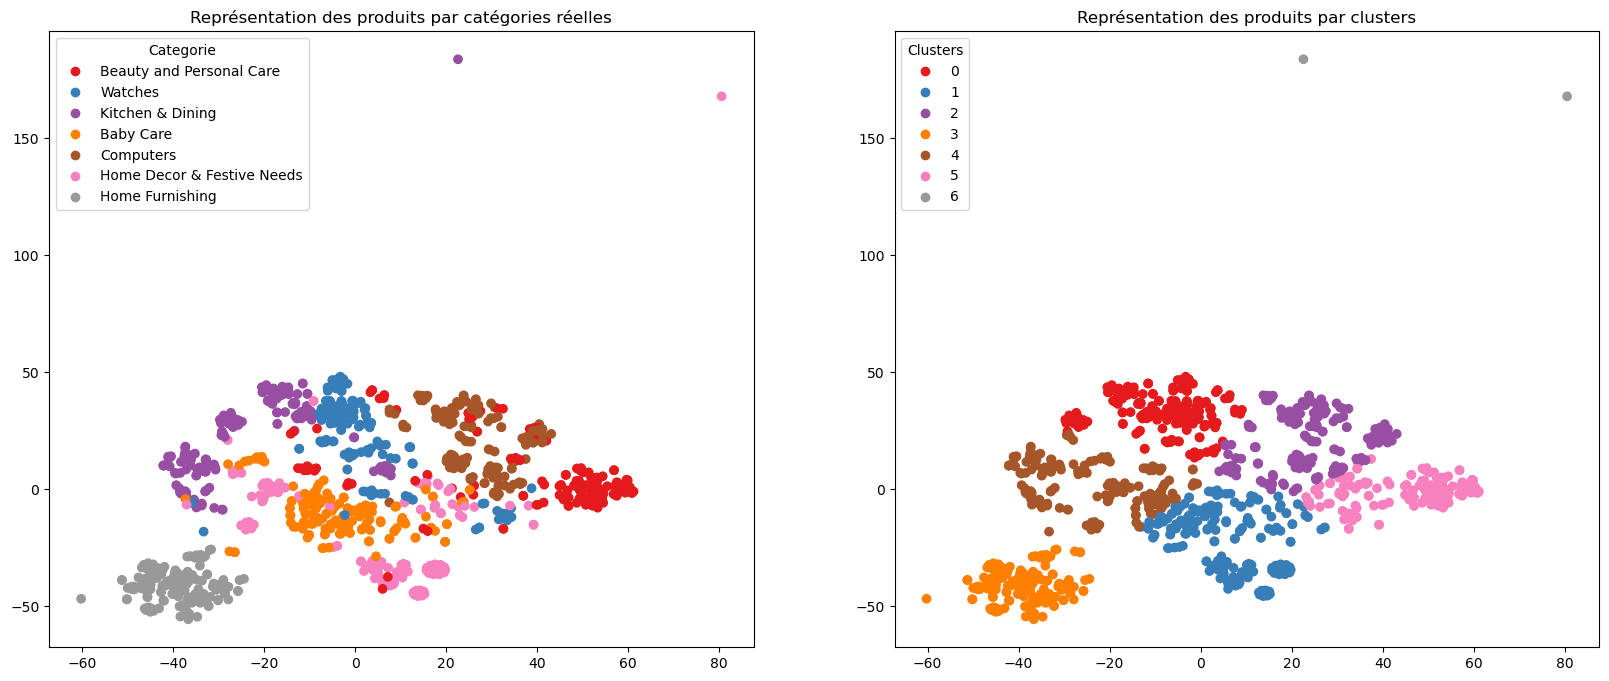

ARI :  0.4284


In [25]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

# Word2Vec

In [26]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import gensim

## Création du modèle Word2Vec

In [27]:
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = None # If not provided, sequences will be padded to the length of the longest individual sequence.

sentences = data1['sentence_bow_lem'].to_list()
# Cela met en minuscules, tokenizes, de-accents (facultatif). – la sortie sont des jetons finaux = chaînes unicode, qui ne seront plus traitées.
sentences = [gensim.utils.simple_preprocess(text, deacc=True ) for text in sentences]

In [28]:
cores = multiprocessing.cpu_count()

# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=1, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=cores-1)

w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=100)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 4711
Word2Vec trained


In [29]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,#######
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 4712


In [30]:
x_sentences.shape

(1050, 371)

## Création de la matrice d'embedding

In [31]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")

word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (4712, 300)


## Création du modèle d'embedding

In [32]:
# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 300)         1413600   
                                                                 
 global_average_pooling1d (G  (None, 300)              0         
 lobalAveragePooling1D)                                          
                                                                 
Total params: 1,413,600
Trainable params: 1,413,600
Non-trainable params: 0
_________________________________________________________________


## Exécution du modèle

In [33]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

33/33 [==============================] - 0s 3ms/step


(1050, 300)

In [34]:
ARI, X_tsne, labels = ARI_fct(embeddings)

ARI :  0.3589 time :  5.0


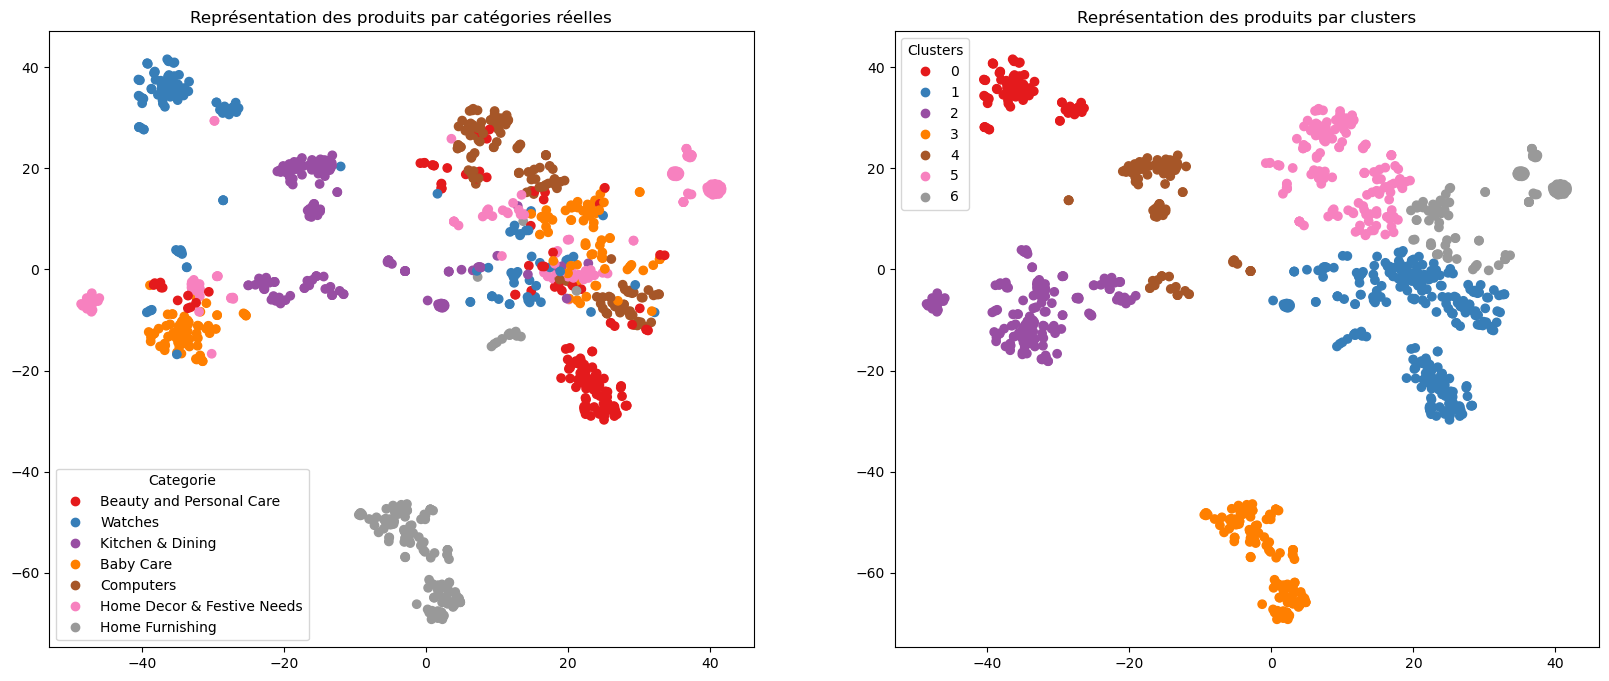

ARI :  0.3589


In [35]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

# BERT

In [36]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import os
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

C:\Users\multi\anaconda3\envs\tens\lib\site-packages\transformers\generation_tf_utils.py:27: FutureWarning: Importing `TFGenerationMixin` from `src/transformers/generation_tf_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import TFGenerationMixin` instead.
  FutureWarning,


In [37]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.10.1
2.10.1
Num GPUs Available:  0
True


In [38]:
print(transformers.__version__)

4.25.1


## Fonctions communes

In [39]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

## BERT HuggingFace

### 'bert-base-uncased'

In [40]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences = data1['sentence_dl'].to_list()

In [41]:
# Création des features

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

1/1 [==============================] - 0s 350ms/step
temps traitement :  48.0


In [42]:
ARI, X_tsne, labels = ARI_fct(features_bert)

ARI :  0.3228 time :  5.0


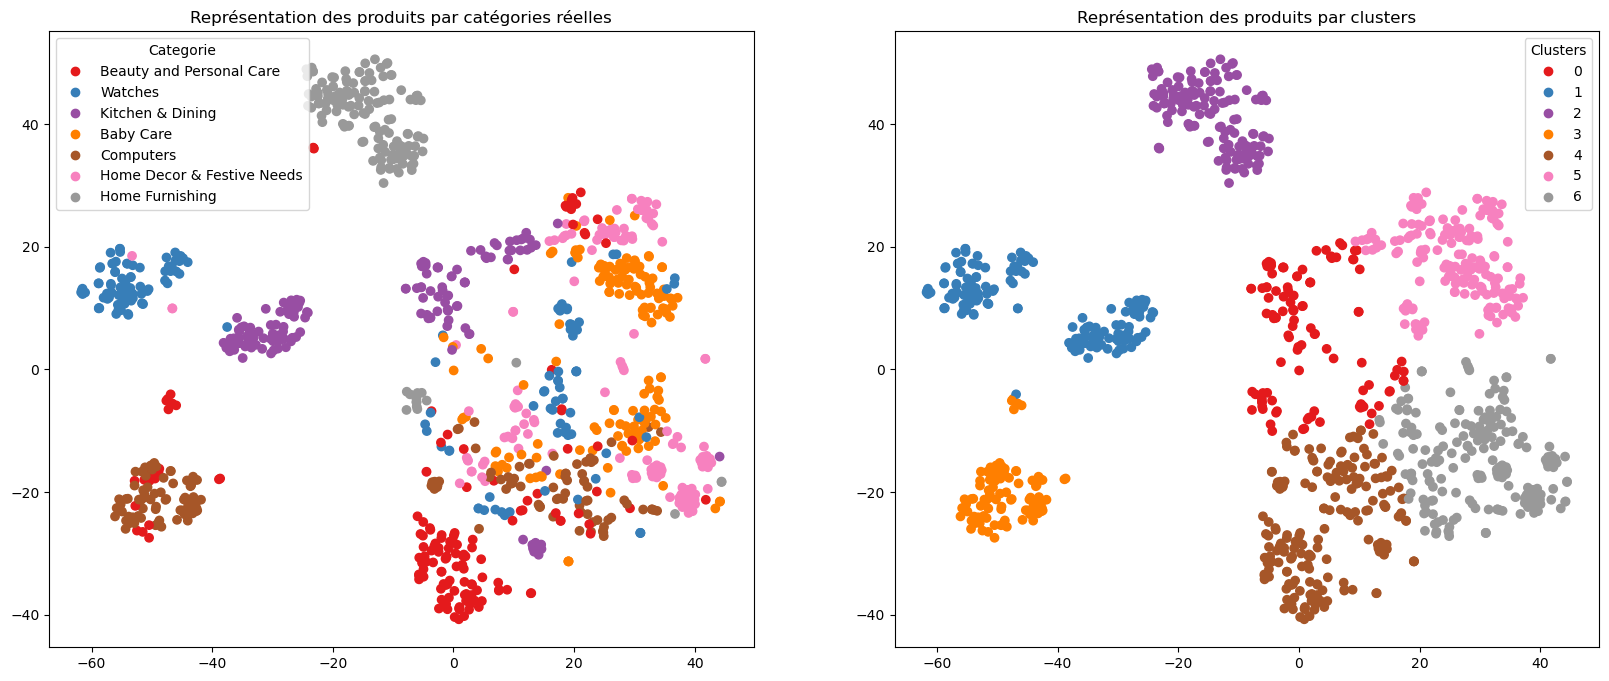

ARI :  0.3228


In [43]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

# USE - Universal Sentence Encoder

In [44]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

In [45]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [46]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [47]:
batch_size = 10
sentences = data1['sentence_dl'].to_list()

In [48]:
features_USE = feature_USE_fct(sentences, batch_size)

In [49]:
ARI, X_tsne, labels = ARI_fct(features_USE)

ARI :  0.4383 time :  5.0


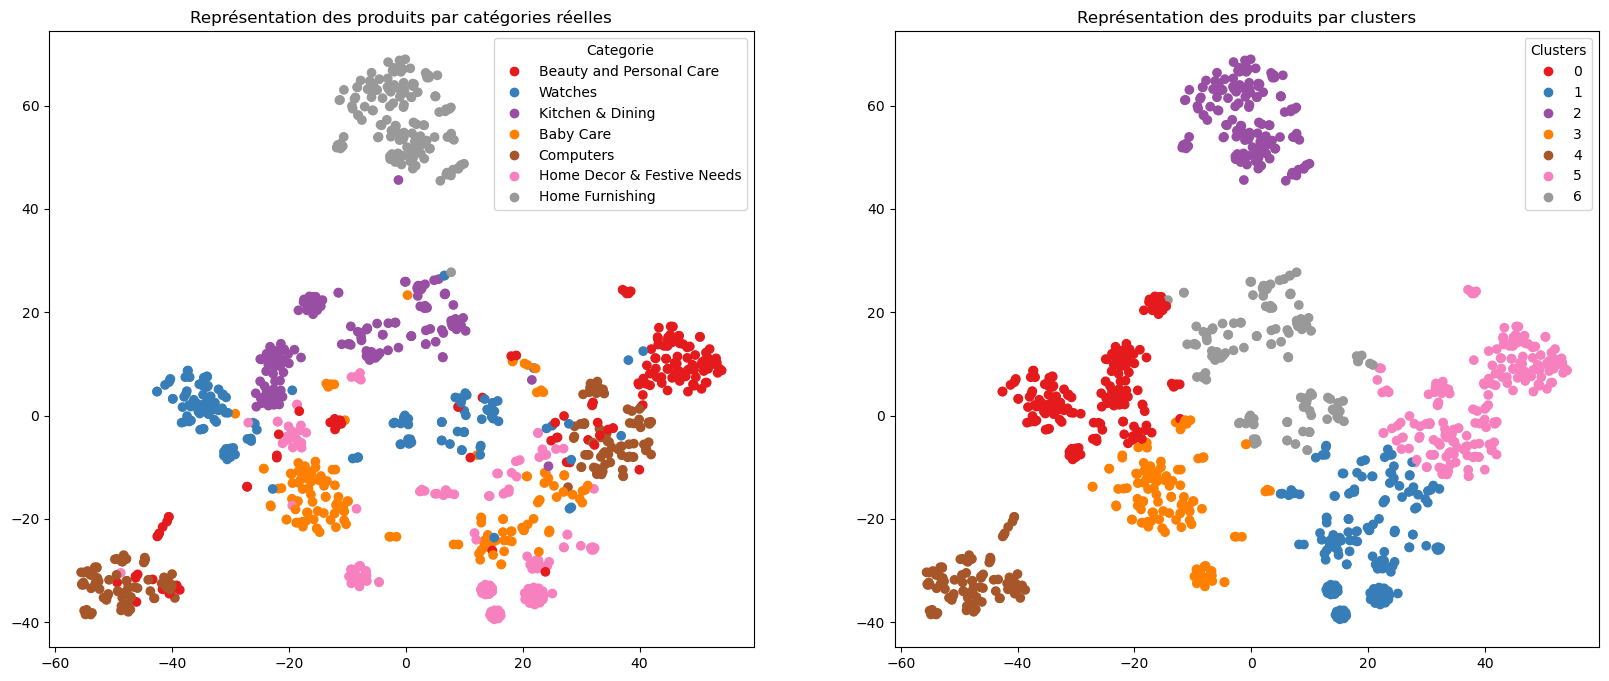

ARI :  0.4383


In [50]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

In [51]:
#### sauvegarde de USE qui a donne le meilleur resultat

In [52]:
use_df = pd.DataFrame(features_USE)
use_df.to_csv("use_df.csv")

# ################################################################

# 2-Traitement des images

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from os import listdir
from sklearn import preprocessing

# Traitement des images

### Préparation du dataset

In [54]:
path = 'C:/Users/multi/Desktop/Projets_DS/P6_ds/Flipkart/Images/'

#data = pd.read_csv("temp1050.csv", encoding='utf-8',index_col = 0)
data = data1[['uniq_id','product_category_tree','image']].copy()
data.rename(columns = {'image':'image_path', 'product_category_tree':'label_name'}, inplace = True)

print(data.shape)
data.head()

(1050, 3)


uniq_id       label_name  \
0  55b85ea15a1536d46b7190ad6fff8ce7  Home Furnishing   
1  7b72c92c2f6c40268628ec5f14c6d590        Baby Care   
2  64d5d4a258243731dc7bbb1eef49ad74        Baby Care   
3  d4684dcdc759dd9cdf41504698d737d8  Home Furnishing   
4  6325b6870c54cd47be6ebfbffa620ec7  Home Furnishing   

                             image_path  
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg  
1  7b72c92c2f6c40268628ec5f14c6d590.jpg  
2  64d5d4a258243731dc7bbb1eef49ad74.jpg  
3  d4684dcdc759dd9cdf41504698d737d8.jpg  
4  6325b6870c54cd47be6ebfbffa620ec7.jpg

In [55]:
list_photos =  data['image_path'].tolist()
print(len(list_photos))

1050


## Création des labels des photos à partir de la categorie des images

In [56]:
list_labels = list(set(data["label_name"]))

le = preprocessing.LabelEncoder()
data["label"] = le.fit_transform(data["label_name"])

data

uniq_id       label_name  \
0     55b85ea15a1536d46b7190ad6fff8ce7  Home Furnishing   
1     7b72c92c2f6c40268628ec5f14c6d590        Baby Care   
2     64d5d4a258243731dc7bbb1eef49ad74        Baby Care   
3     d4684dcdc759dd9cdf41504698d737d8  Home Furnishing   
4     6325b6870c54cd47be6ebfbffa620ec7  Home Furnishing   
...                                ...              ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc        Baby Care   
1046  fd6cbcc22efb6b761bd564c28928483c        Baby Care   
1047  5912e037d12774bb73a2048f35a00009        Baby Care   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6        Baby Care   
1049  f2f027ad6a6df617c9f125173da71e44        Baby Care   

                                image_path  label  
0     55b85ea15a1536d46b7190ad6fff8ce7.jpg      4  
1     7b72c92c2f6c40268628ec5f14c6d590.jpg      0  
2     64d5d4a258243731dc7bbb1eef49ad74.jpg      0  
3     d4684dcdc759dd9cdf41504698d737d8.jpg      4  
4     6325b6870c54cd47be6ebfbffa620ec7.jpg      4  
...                                    ...    ...  
1045  958f54f4c46b53c8a0a9b8167d9140bc.jpg      0  
1046  fd6cbcc22efb6b761bd564c28928483c.jpg      0  
1047  5912e037d12774bb73a2048f35a00009.jpg      0  
1048  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg      0  
1049  f2f027ad6a6df617c9f125173da71e44.jpg      0  

[1050 rows x 4 columns]

In [57]:
data.groupby("label").count()

uniq_id  label_name  image_path
label                                 
0          150         150         150
1          150         150         150
2          150         150         150
3          150         150         150
4          150         150         150
5          150         150         150
6          150         150         150

## Affichage d'exemples d'images par label

Beauty and Personal Care


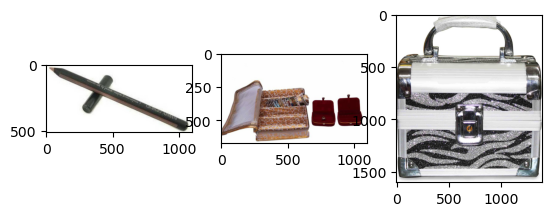

Watches


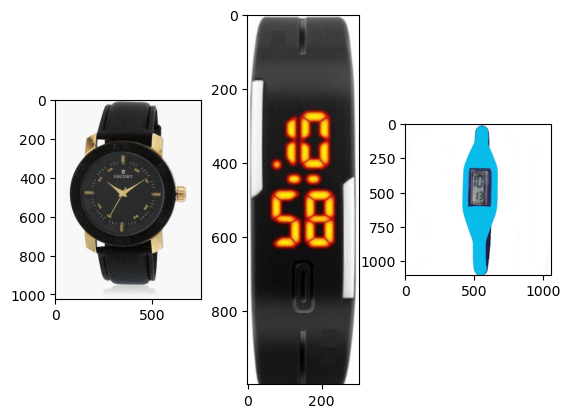

Kitchen & Dining


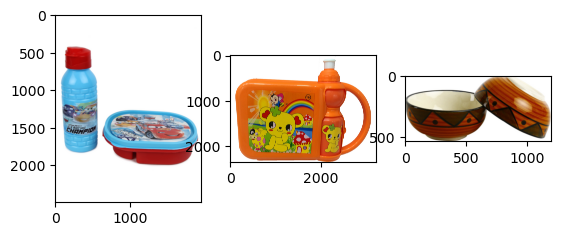

Baby Care


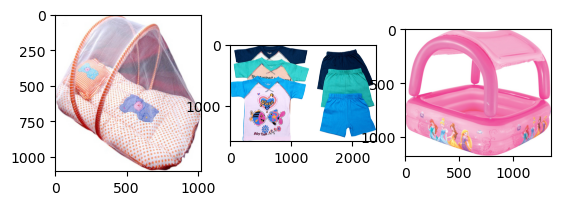

Computers


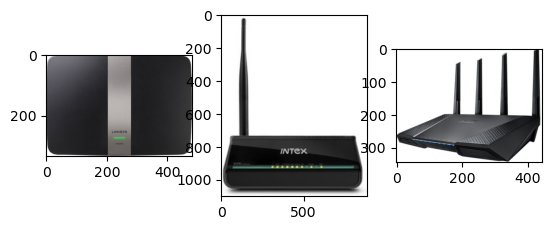

Home Decor & Festive Needs


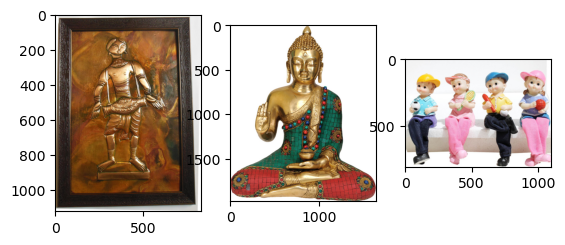

Home Furnishing


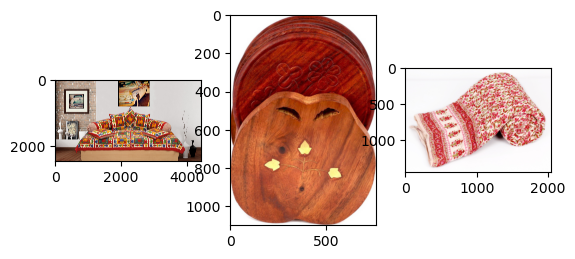

In [58]:
from matplotlib.image import imread


def list_fct(name) :
    list_image_name = [list_photos[i] for i in range(len(data)) if data["label_name"][i]==name]
    return list_image_name

for name in list_labels :
    print(name)
    # print("-------")
    for i in range(3):
        plt.subplot(130 + 1 + i)
        filename = path + list_fct(name)[i+10]
        image = imread(filename)
        plt.imshow(image)
    plt.show()

# Pré-traitement des images via SIFT

In [59]:
def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist

## Détermination et affichage des descripteurs SIFT

#### Sans pretraitement avec equalizeHist, le nb de descripteurs:  (709, 128)

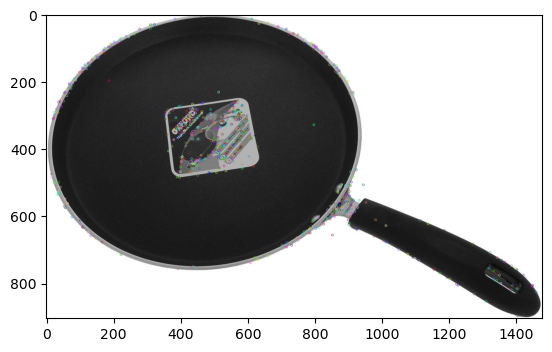

Sans pretraitement avec equalizeHist, le nb de descripteurs:  (709, 128)

[[31.  1.  0. ...  0.  0.  0.]
 [69.  6.  0. ...  0.  0.  2.]
 [ 0.  0.  0. ...  0.  0.  2.]
 ...
 [20.  1.  0. ...  0.  0.  5.]
 [50.  3.  0. ...  0.  0.  2.]
 [19.  2.  0. ...  0.  0.  5.]]


In [60]:
import cv2

sift = cv2.xfeatures2d.SIFT_create() #avec tous les descripteurs
image = cv2.imread(path+list_photos[86],0) # convert in gray 86e image
#image = cv2.equalizeHist(image)   # equalize image histogram
kp, des = sift.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,image)
plt.imshow(img)
plt.show()
print("Sans pretraitement avec equalizeHist, le nb de descripteurs: ", des.shape)
print()
print(des)

#### Avec pretraitement avec equalizeHist, le nb de descripteurs:  (4656, 128)

* L'image 86 contient 4656 descripteurs
* Chaque descripteur est un vecteur de longueur 128

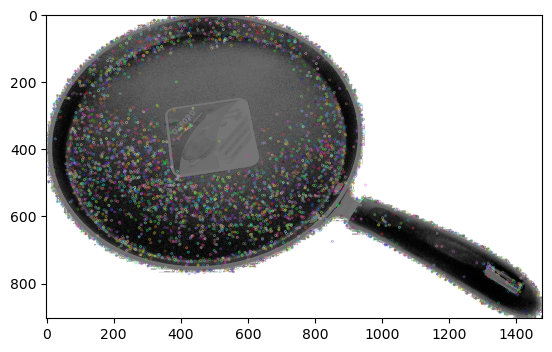

Descripteurs :  (4656, 128)

[[ 4.  2.  6. ...  5.  0.  0.]
 [96. 20.  0. ...  9.  2.  0.]
 [55. 16.  0. ...  0.  1.  0.]
 ...
 [12.  0.  0. ...  0.  0.  0.]
 [67. 19.  5. ...  0. 34. 13.]
 [ 0.  5. 27. ...  0.  0.  0.]]


In [61]:
import cv2

sift = cv2.xfeatures2d.SIFT_create() #avec tous les descripteurs
image = cv2.imread(path+list_photos[86],0) # convert in gray 86e image
image = cv2.equalizeHist(image)   # equalize image histogram
kp, des = sift.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,image)
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)

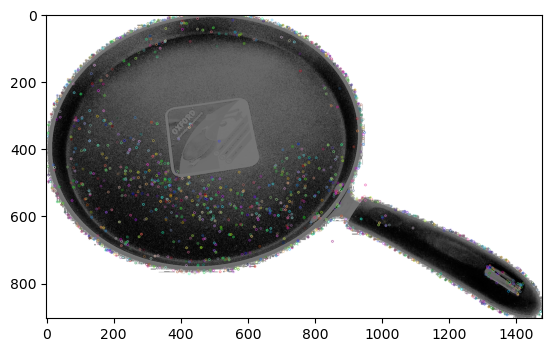

Descripteurs :  (1501, 128)

[[ 4.  2.  6. ...  5.  0.  0.]
 [96. 20.  0. ...  9.  2.  0.]
 [55. 16.  0. ...  0.  1.  0.]
 ...
 [93. 37.  4. ... 25.  3.  5.]
 [ 7.  0.  9. ... 26. 15. 22.]
 [20. 23. 43. ...  4. 16. 27.]]


In [62]:
import cv2

sift = cv2.xfeatures2d.SIFT_create(1500) #avec 1500 descripteurs
image = cv2.imread(path+list_photos[86],0) # convert in gray 86e image
image = cv2.equalizeHist(image)   # equalize image histogram
kp, des = sift.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,image)
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)

## Créations des descripteurs de chaque image
* Pour chaque image passage en gris et equalisation
* création d'une liste de descripteurs par image ("sift_keypoints_by_img") qui sera utilisée pour réaliser les histogrammes par image
* création d'une liste de descripteurs pour l'ensemble des images ("sift_keypoints_all") qui sera utilisé pour créer les clusters de descripteurs

In [63]:
# identification of key points and associated descriptors
import time, cv2
sift_keypoints = []
temps1=time.time()
sift = cv2.xfeatures2d.SIFT_create(1500) # choix de 1500

for image_num in range(len(list_photos)) :
    if image_num%100 == 0 : print(image_num)
    image = cv2.imread(path+list_photos[image_num],0) # convert in gray
    # image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    res = cv2.equalizeHist(image)   # equalize image histogram
    kp, des = sift.detectAndCompute(res, None)
    sift_keypoints.append(des)

sift_keypoints_by_img = np.asarray(sift_keypoints) #creation d une liste de descripteurs par image
sift_keypoints_all    = np.concatenate(sift_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", sift_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000

Nombre de descripteurs :  (1417165, 128)
temps de traitement SIFT descriptor :           207.11 secondes


C:\Users\multi\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  from ipykernel import kernelapp as app


## Création des clusters de descripteurs
* Utilisation de MiniBatchKMeans pour obtenir des temps de traitement raisonnables

In [64]:
from sklearn import cluster, metrics

# Determination number of clusters
temps1=time.time()

# k = int(round(np.sqrt(len(sift_keypoints_all)),0)) # #racine carre du nombre total de descripteurs 
k = 70 # avec categ x10

print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")  

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(sift_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  70
Création de 70 clusters de descripteurs ...
temps de traitement kmeans :            30.61 secondes


## Création des features des images
* Pour chaque image : 
   - prédiction des numéros de cluster de chaque descripteur
   - création d'un histogramme = comptage pour chaque numéro de cluster du nombre de descripteurs de l'image

In [65]:
# Creation of histograms (features)
temps1=time.time()

# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(sift_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)
 
duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :             5.67 secondes


In [66]:
im_features.shape

(1050, 70)

#### Exemple d'histogramme : pour la 87e image (1500 descripteurs)

In [67]:
sift_keypoints_by_img[86].shape

(1501, 128)

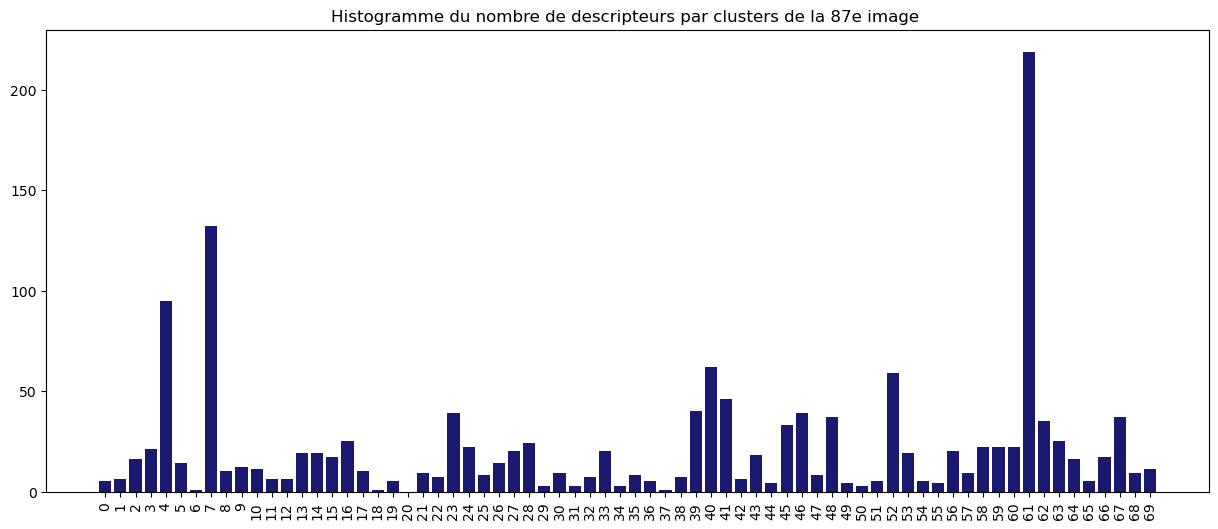

In [68]:
# plot grouped bar chart
plt.figure(figsize=(15,6))
image_2 = pd.DataFrame(im_features[86], columns=['Cluster'])
image_2['Cluster'] = image_2['Cluster'].astype('float')
image_2['Cluster'] = round((image_2['Cluster'] * 1501),2)
image_2 = image_2.reset_index()
image_2['index'] = image_2['index'].astype('str')

plt.bar(x=image_2['index'],
        height=image_2['Cluster'],
        color='midnightblue')

plt.xticks(rotation=90)

plt.title('Histogramme du nombre de descripteurs par clusters de la 87e image ');

In [69]:
# bag of visual words = groupes de descripteurs
im_features[86].shape #70 features

(70,)

## Réductions de dimension

### Réduction de dimension PCA
* La réduction PCA permet de créer des features décorrélées entre elles, et de diminuer leur dimension, tout en gardant un niveau de variance expliquée élevé (99%)
* L'impact est une meilleure séparation des données via le T-SNE et une réduction du temps de traitement du T-SNE

In [70]:
im_features.shape

(1050, 70)

In [71]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features.shape)
#pca = decomposition.PCA(n_components=0.99)
pca = decomposition.PCA(n_components=0.99999)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 70)
Dimensions dataset après réduction PCA :  (1050, 34)


In [72]:
#Somme de la proportion de la variance expliquée
print((pca.explained_variance_ratio_).sum())

0.9999902949408541


### Réduction de dimension T-SNE
* Réduction de dimension en 2 composantes T-SNE pour affichage en 2D des images

In [73]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = temp["product_category_tree"]
print(df_tsne.shape)


(1050, 3)


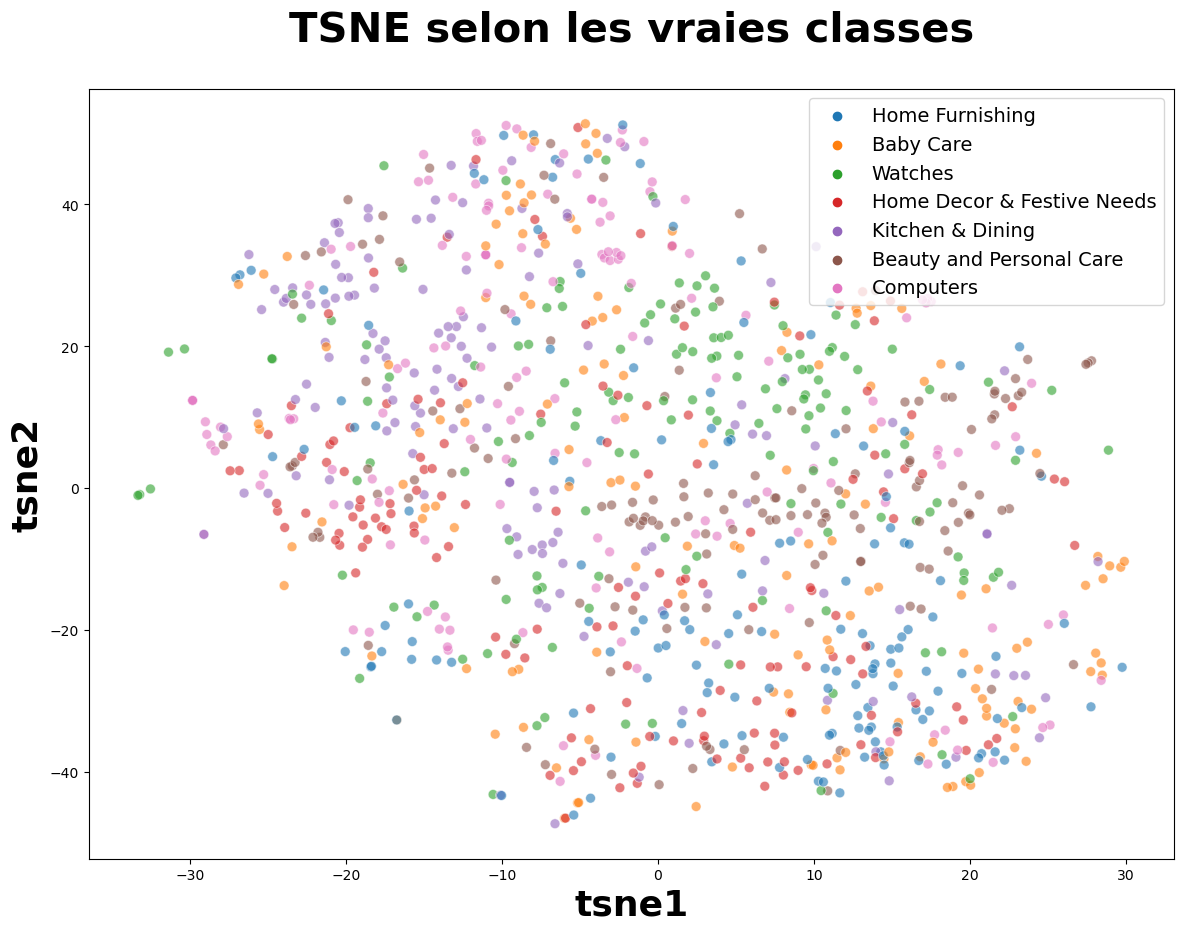

In [74]:
plt.figure(figsize=(14,10))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

## Analyse mesures : similarité entre catégories et clusters

###  Création de clusters à partir du T-SNE

In [75]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

(1050, 4)


###  Affichage des images selon clusters et calcul ARI de similarité catégories images / clusters
* Le score ARI de 0.06 reste tres faible

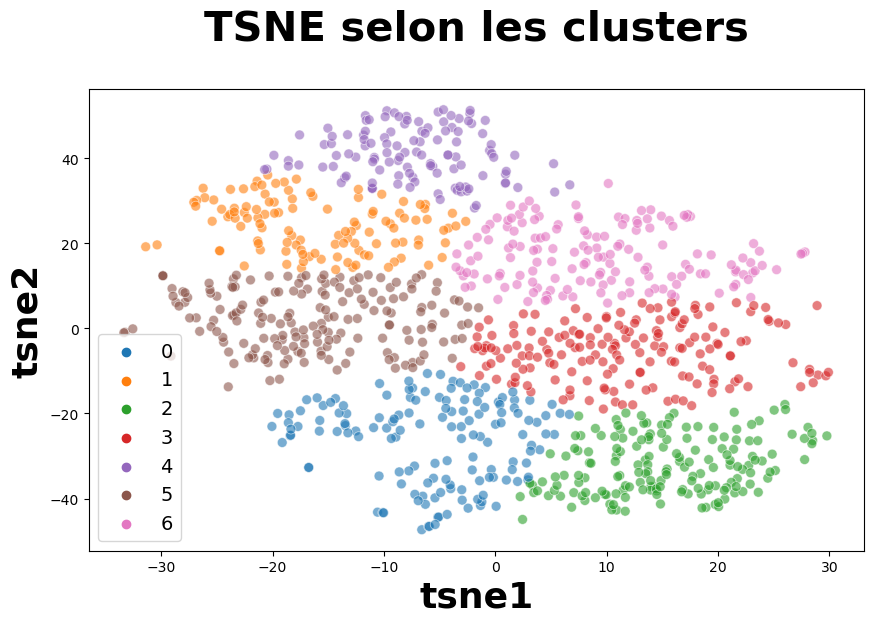

ARI :  0.06368866088468417


In [76]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = data["label"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

### Analyse par classes
* La matrice de confusion doit être transformée pour mettre avoir en colonne le même ordre des catégories supposées qu'en ligne
* Cette transformation atteint ses limites pour les 2 catégories "shine" et "sunshine" qui sont peu séparées (donc elle a été réalisée manuellement au lieu d'utiliser la fonction "argmax")

In [77]:
df_tsne.groupby("cluster").count()["class"]

cluster
0    145
1    114
2    171
3    173
4    117
5    178
6    152
Name: class, dtype: int64

In [78]:
df_tsne

tsne1      tsne2            class  cluster
0    -20.056736 -23.058929  Home Furnishing        0
1      7.414508 -28.772663        Baby Care        2
2     17.082378  15.037024        Baby Care        6
3      8.049550 -35.133293  Home Furnishing        2
4     -0.690704 -26.773756  Home Furnishing        0
...         ...        ...              ...      ...
1045  -2.438187   1.127270        Baby Care        5
1046  13.651586  25.731407        Baby Care        6
1047  -4.427603 -35.480900        Baby Care        0
1048  28.548666 -12.789764        Baby Care        3
1049  -1.410073 -35.823730        Baby Care        0

[1050 rows x 4 columns]

In [79]:
cls.labels_ = df_tsne["cluster"]
conf_mat = metrics.confusion_matrix(labels, cls.labels_)
print(conf_mat)

[[16 14 44 23 18 19 16]
 [17 10  8 62  9 19 25]
 [15 15 12 16 44 33 15]
 [28  4 31 20  7 46 14]
 [35  7 58 15 13  9 13]
 [14 46 11 13 21 34 11]
 [20 18  7 24  5 18 58]]


In [80]:
def conf_mat_transform(y_true,y_pred) :
    conf_mat = metrics.confusion_matrix(y_true,y_pred)
    
    corresp = np.argmax(conf_mat, axis=0)
    #corresp = [0, 1, 2, 3, 4, 5, 6]
    #corresp = [3, 1, 2, 0]
    print ("Correspondance des clusters : ", corresp)
    # y_pred_transform = np.apply_along_axis(correspond_fct, 1, y_pred) !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

cls_labels_transform = conf_mat_transform(labels, cls.labels_)
conf_mat = metrics.confusion_matrix(labels, cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(labels, cls_labels_transform))

Correspondance des clusters :  [4 5 4 1 2 3 6]
[[ 0 23 18 19 60 14 16]
 [ 0 62  9 19 25 10 25]
 [ 0 16 44 33 27 15 15]
 [ 0 20  7 46 59  4 14]
 [ 0 15 13  9 93  7 13]
 [ 0 13 21 34 25 46 11]
 [ 0 24  5 18 27 18 58]]

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       150
           1       0.36      0.41      0.38       150
           2       0.38      0.29      0.33       150
           3       0.26      0.31      0.28       150
           4       0.29      0.62      0.40       150
           5       0.40      0.31      0.35       150
           6       0.38      0.39      0.38       150

    accuracy                           0.33      1050
   macro avg       0.30      0.33      0.30      1050
weighted avg       0.30      0.33      0.30      1050



C:\Users\multi\anaconda3\envs\tens\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


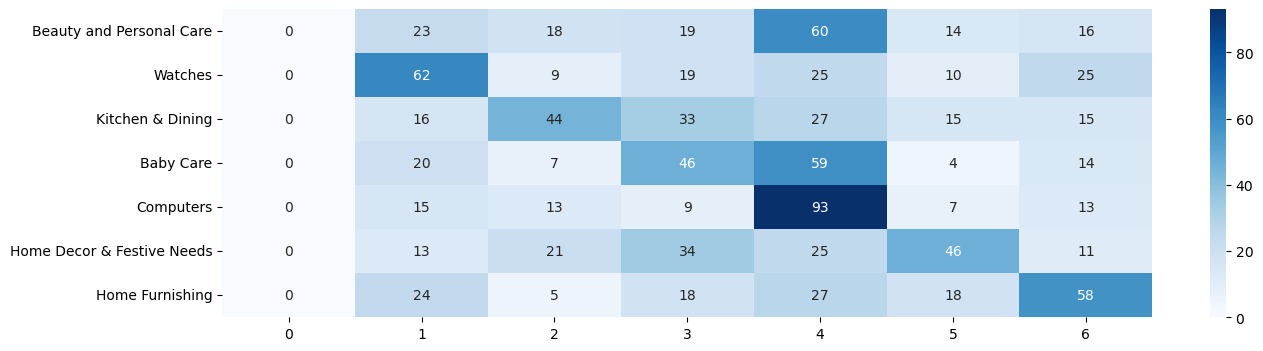

In [81]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (15,4))
sns.heatmap(df_cm, annot=True, cmap="Blues");

#################################################################################################

#### Nous allons utiliser le Transfer Learning (des modèles de Deep Learning pré-entraînés)  Pour effectuer l'extraction des features des images afin de réaliser un clustering. Pour faire ceci, il faut retirer les dernières couches fully-connected en configurant le paramètre include_top à False. 
Les différentes étapes de prétraitement pour le Transfer Learning sont : 
Le chargement et le redimensionnement de l'image ; 
La conversion de l'image en tableau numpy ; 
L'ajout de la première dimension pour respecter le format d'entrée du réseau (4 dimensions) ; 
La normalisation du tableau numpy. 
Il existe plusieurs modèles pré-entraînés. Il faut donc sélectionner le modèle le plus adapté à la tâche à effctuer.  Les modèles utilisés dans notre cas d'étude sont pré-entraînés sur ImageNet, on a  choisi VGG16, ResNet101 et Resnet50. 
Lien: https://nnabla.readthedocs.io/en/latest/python/api/models/imagenet.html

In [82]:
# Import libraries
import warnings
import pandas as pd
%pylab inline
import seaborn as sns
import time

import os
import shutil
from IPython.display import clear_output

from sklearn import (preprocessing, cluster, metrics,
                     manifold, decomposition)


# CNN (Convolutional Neural Network) Transfer learning libraries
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.resnet import ResNet101
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf

# Disable WARNING, INFO and DEBUG logging everywhere
warnings.filterwarnings('ignore')
logging.disable(logging.WARNING)

Populating the interactive namespace from numpy and matplotlib


C:\Users\multi\anaconda3\envs\tens\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['resize', 'minimum', 'maximum', 'imread', 'logging', 'hist', 'subtract', 'add', 'dot', 'multiply', 'concatenate', 'average']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [83]:
# Fonctions utilisés pour le clustering
def apply_clustering(data, perplexity, N_CLUST, apply_pca):
    '''This function applies PCA or TruncatedSVD, t-SNE, clustering
    and calculates ARI of true labels and predicted labels.
    '''
    start_time = time.time()
    
    # Applying the PCA
    if apply_pca is True:
        # Normalization
        transformer = preprocessing.QuantileTransformer(
            output_distribution='normal',
            random_state=0)
        data = transformer.fit_transform(data)

        # Standardization
        scaler = preprocessing.StandardScaler()
        data = scaler.fit_transform(data)
    
        # Using PCA to select decorrelated features for dense matrix
        print("\nDataset dimensions before PCA: {}".format(data.shape))
        pca = decomposition.PCA(n_components=0.99)
        data = pca.fit_transform(data)
        print("Dataset dimensions after PCA: {}".format(data.shape))

    # Applying t-SNE
    tsne = manifold.TSNE(
        # Dimension of the embedded space
        n_components=2,
        # The perplexity is related to the number of nearest neighbors
        # that is used in other manifold learning algorithms
        perplexity=perplexity,
        # Maximum number of iterations for the optimization
        n_iter=2000,
        # Initialization of embedding
        init='pca',
        # The learning rate for t-SNE is usually in the range [10, 1000]
        learning_rate=200,
        # The number of parallel jobs to run for neighbors search
        n_jobs=-1,
        # Determines the random number generator
        random_state=0)
    X_tsne = tsne.fit_transform(data)
    
    kmeans = cluster.KMeans(
        # The number of clusters and
        # the number of centroids to generate
        n_clusters=N_CLUST,
        # Method for initialization: selects initial cluster centers
        # for k-mean clustering in a smart way to speed up convergence
        init='k-means++',
        # Number of time the k-means algorithm will be run
        # with different centroid seeds
        n_init=100,
        # Determines random number generation
        # for centroid initialization
        random_state=0)
    kmeans.fit(X_tsne)
    
    # ARI calculation
    ARI = metrics.adjusted_rand_score(labels, kmeans.labels_)
    duration = time.time() - start_time
    print("Processing time: {:.1f} seconds".format(duration))
    print("ARI: {:.3f}".format(ARI))
    return ARI, X_tsne, kmeans.labels_


def display_clustering(X_tsne, categories, pred_labels, ARI):
    '''This function displays t-SNE according to categories and clusters.'''
    tsne_df = pd.DataFrame(X_tsne[:, 0:2],
                       columns=['tsne1', 'tsne2'])
    tsne_df['label']= categories
    tsne_df['cluster'] = list(pred_labels)
    N_CLASS = len(np.unique(list(tsne_df['label'])))
    
    # Set seaborn plotting aesthetics as default
    sns.set()
    
    # Define plotting region (1 row, 2 columns)
    fig, axes = plt.subplots(1, 2, figsize=(20, 10))
    sns.scatterplot(
        data=tsne_df,
        x='tsne1',
        y='tsne2',
        hue='label',
        palette=sns.color_palette('tab10', n_colors=N_CLASS),
        s=60,
        alpha=0.8,
        ax=axes[0],
        legend='brief')
    axes[0].set_title('t-SNE according to true categories',
                      fontsize=26,
                      pad=35,
                      fontweight='bold')
    axes[0].set_xlabel('tsne1',
                       fontsize=21,
                       fontweight='bold')
    axes[0].set_ylabel('tsne2',
                       fontsize=21,
                       fontweight='bold')
    axes[0].legend(prop={'size': 10})
    sns.scatterplot(
        data=tsne_df,
        x='tsne1',
        y='tsne2',
        hue='cluster',
        palette=sns.color_palette('tab10', n_colors=N_CLASS),
        s=60,
        alpha=0.8,
        ax=axes[1],
        legend='brief')
    axes[1].set_title('t-SNE according to predicted clusters',
                      fontsize=26,
                      pad=35,
                      fontweight='bold')
    axes[1].set_xlabel('tsne1',
                       fontsize=21,
                       fontweight='bold')
    axes[1].set_ylabel('tsne2',
                       fontsize=21,
                       fontweight='bold')
    axes[1].legend(prop={'size': 10})
    plt.show()
    print("ARI: {:.3f}".format(ARI))
    print(tsne_df.groupby('cluster').count()['label'])
    

In [84]:
os.chdir('C:/Users/multi/Desktop/Projets_DS/P6_ds/')
os.getcwd()

'C:\\Users\\multi\\Desktop\\Projets_DS\\P6_ds'

In [85]:
#df = pd.read_csv("temp1050.csv", encoding='utf-8',index_col = 0)
df = data1.copy()
df = df[['image','product_category_tree']].copy()
df.rename(columns = {'image':'filepaths', 'product_category_tree':'labels'}, inplace = True)
#df['filepaths'] = str('C:/Users/multi/Desktop/Projets_DS/P6_ds/') + df['id']
#df['filepaths'] = df['id']
print(df.shape)
df.head(10)

(1050, 2)


filepaths           labels
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg  Home Furnishing
1  7b72c92c2f6c40268628ec5f14c6d590.jpg        Baby Care
2  64d5d4a258243731dc7bbb1eef49ad74.jpg        Baby Care
3  d4684dcdc759dd9cdf41504698d737d8.jpg  Home Furnishing
4  6325b6870c54cd47be6ebfbffa620ec7.jpg  Home Furnishing
5  893aa5ed55f7cff2eccea7758d7a86bd.jpg          Watches
6  f355cc1ccb08bd0d283ed979b7ee7515.jpg          Watches
7  dd0e3470a7e6ed76fd69c2da27721041.jpg          Watches
8  41384da51732c0b4df3de8f395714fbb.jpg          Watches
9  710ed5f2393a4b9e8823aa0029f71f93.jpg          Watches

In [86]:
classes = np.unique(df.labels)
classes_num = classes.size
classes_num

7

In [87]:
train_dir = 'C:/Users/multi/Desktop/Projets_DS/P6_ds/Flipkart/Images/'  # the images directory
images_names = os.listdir(train_dir)  # names of the files in the directory
images_num = len(images_names)
print(f'Number of images: {images_num}')

Number of images: 1050


In [88]:
labels_jpg = df.copy(deep=True)
grouped_ids = labels_jpg.groupby('labels')['filepaths'].apply(list).to_dict()
print(classes[0], grouped_ids[classes[0]])

Baby Care ['7b72c92c2f6c40268628ec5f14c6d590.jpg', '64d5d4a258243731dc7bbb1eef49ad74.jpg', '90e56526f4c5892beac49f262b85150a.jpg', '5325213d84c80ad310b6e4b37a1ac824.jpg', 'f4e7f269319ba9cf5507a9e2febacbf5.jpg', '903d63e2b71d692ccd628e1de516516e.jpg', '141d2b743c477043041faddf9233c8ad.jpg', '7a3f11f380a1bf85338ab3771ff81e9f.jpg', 'ae45b64d808a883aa35f2bf4de879cac.jpg', '320833ab08c9a94ef83520612899a85f.jpg', '601817defaff9d0e30e1b72f96d3975f.jpg', '3cdfd9df09f61a8fd178bafcc8dbed31.jpg', '184ecf07ca4e2872eaf53d2344a1e783.jpg', 'f1ee63a5f0db853e2c1b377778580d39.jpg', '8015db34d09642b046c775e8157dd729.jpg', 'bc784846bd59a16832454416ac708003.jpg', 'be09f5a3a88ac10ae14c791fc8ac0dae.jpg', '7dd5e83e2108a97659577e50879f9d9f.jpg', '70578f48cc96bbb60d040e08025e521d.jpg', '32cf0691248297655e2c1728b12e2262.jpg', '719677b02bfccafb86e9be78f36f938b.jpg', 'a8ea6fc2b3cd95f46bced80853ce8e0e.jpg', '7f7c64d439d64656d6baa40f5798cdf5.jpg', '8876d7569efdaff5a21b33a1ab44a13d.jpg', '7c15895bbfd7da97c219be5b2815

In [89]:
def list_fct(cat) :
    list_image_cat = list(df[df['labels']==cat]['filepaths'])
    return list_image_cat

In [90]:
list_photos = df['filepaths']
list_photos

0       55b85ea15a1536d46b7190ad6fff8ce7.jpg
1       7b72c92c2f6c40268628ec5f14c6d590.jpg
2       64d5d4a258243731dc7bbb1eef49ad74.jpg
3       d4684dcdc759dd9cdf41504698d737d8.jpg
4       6325b6870c54cd47be6ebfbffa620ec7.jpg
                        ...                 
1045    958f54f4c46b53c8a0a9b8167d9140bc.jpg
1046    fd6cbcc22efb6b761bd564c28928483c.jpg
1047    5912e037d12774bb73a2048f35a00009.jpg
1048    c3edc504d1b4f0ba6224fa53a43a7ad6.jpg
1049    f2f027ad6a6df617c9f125173da71e44.jpg
Name: filepaths, Length: 1050, dtype: object

#### 4 images au hazard

In [91]:
width, height, channels = 512, 512, 3

images_samples = np.zeros((4, height, width, 3), dtype=float)
samples_labels = []

# get random 4 images
rnd_indexes = np.random.randint(0, images_num, 4)
for i, rnd_idx in enumerate(rnd_indexes):
    img_filename = list_photos[rnd_idx]
    img_id = img_filename[:-4]
    img_bgr = cv2.imread(train_dir + '/' + img_filename)  # loads the images channels in (blue, green, red) order
    images_samples[i] = cv2.resize(src=img_bgr[:, :, [2, 1, 0]], dsize=(width, height)) / 255  # store the random image
    img_label = df.labels[df.filepaths == img_filename].values[0]
    samples_labels.append(img_label)  # store the random images' label

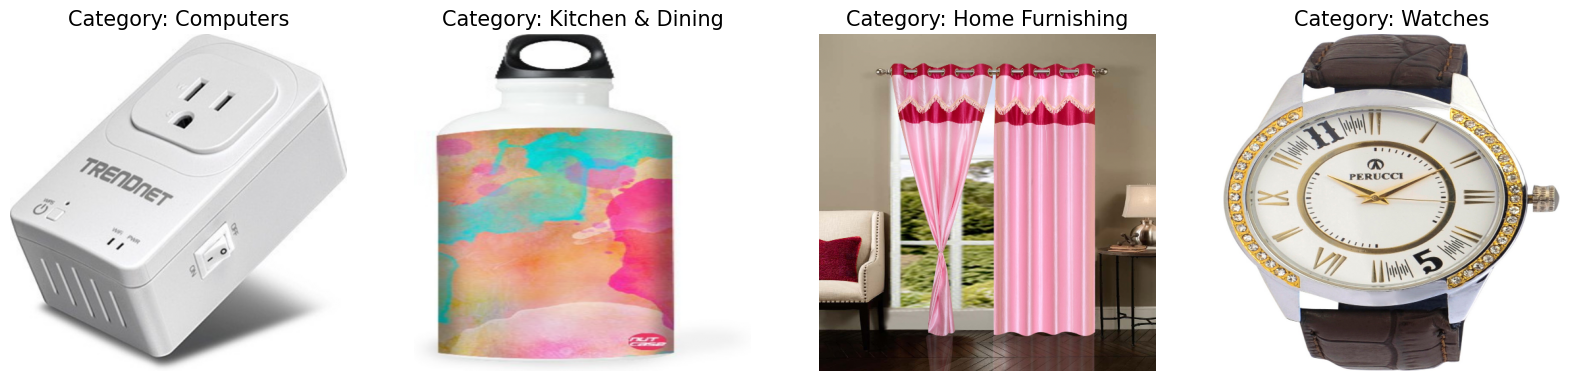

In [92]:
# view the 4 samples
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
for ax, img, label in zip(axs.ravel(), images_samples, samples_labels):
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f'Category: {label}', size=15);

#### 4 images au hazard....exemples d'applications de filtres

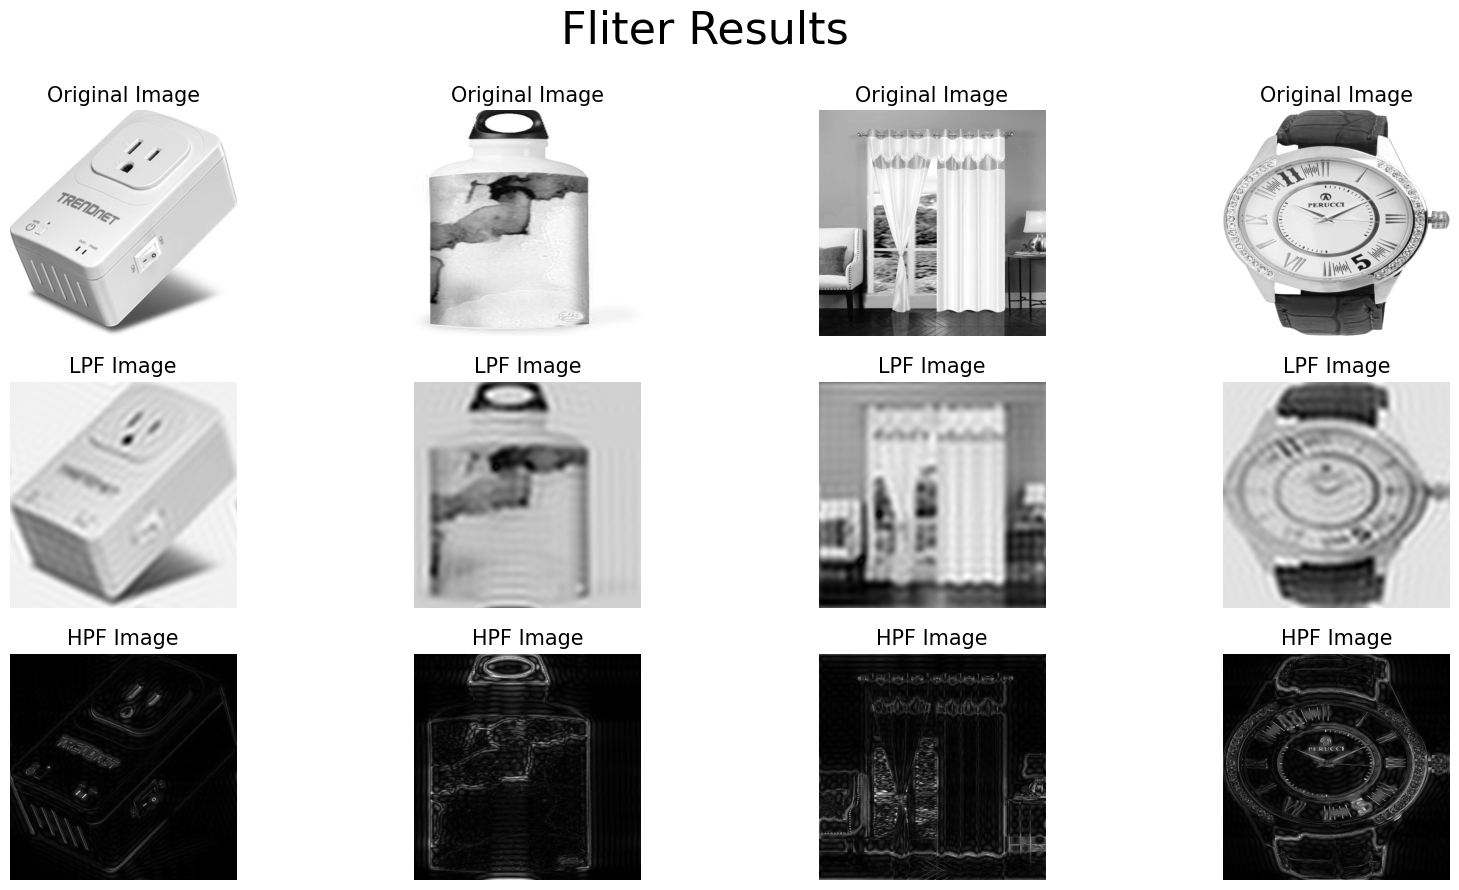

In [93]:
def img_process(img):
    img_float32 = np.float32(img)
 
    dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    # image en niveaux de gris
    magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

    rows, cols = img.shape
    crow, ccol = int(rows/2) , int(cols/2)     # 

    # filtre bas
    mask = np.zeros((rows, cols, 2), np.uint8)
    mask[crow-20:crow+20, ccol-20:ccol+20] = 1
 
    # IDFT
    fshift = dft_shift*mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back_low = cv2.idft(f_ishift)
    img_back_low = cv2.magnitude(img_back_low[:,:,0],img_back_low[:,:,1])          

    # filtre haut
    mask = np.ones((rows, cols, 2), np.uint8)
    mask[crow-20:crow+20, ccol-20:ccol+20] = 0
 
    # IDFT
    fshift = dft_shift*mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back_high = cv2.idft(f_ishift)
    img_back_high = cv2.magnitude(img_back_high[:,:,0],img_back_high[:,:,1])
    return img_back_low,img_back_high

#  4 échantillons améliorés
fig, axs = plt.subplots(3, 4, figsize=(20,10))  
fig.suptitle('Fliter Results', size=32)
for axs_col, img in enumerate(images_samples):
    img = img[:, :, 0]
    img_back_low,img_back_high = img_process(img)
    
    axs[0, axs_col].imshow(img, cmap='gray')
    axs[0, axs_col].axis('off')
    axs[0, axs_col].set_title('Original Image', size=15)
    
    axs[1, axs_col].imshow(img_back_low, cmap = 'gray')
    axs[1, axs_col].axis('off')
    axs[1, axs_col].set_title('LPF Image', size=15)
    
    axs[2, axs_col].imshow(img_back_high, cmap = 'gray')
    axs[2, axs_col].axis('off')
    axs[2, axs_col].set_title('HPF Image', size=15)

#### 4 images au hazard....exemples d'augmentation

In [94]:
from keras.preprocessing.image import ImageDataGenerator

norm_factor = 1 / 255

# L'augmentation des données est effectuée à l'aide de la classe ImageDataGenerator de Keras
transform_params = {
    'featurewise_center': False,
    'featurewise_std_normalization': False,
    'samplewise_center': False,
    'samplewise_std_normalization': False,
    'rotation_range': 30,  # L'image est retournée au hasard entre (-30,30)
    'width_shift_range': 0.15,  # L'image est décalée horizontalement de manière aléatoire dans (-0,05,0,05) (pourcentage)
    'height_shift_range': 0.15,  # L'image se déplace horizontalement de manière aléatoire dans (-0,05,0,05) (pourcentage
    'horizontal_flip': True,  # Retourner aléatoirement l'image horizontalement
    'rescale': norm_factor  # L'image est mise à l'échelle par norm_factor
}

# the generator used for training - gives augmented images
img_gen = ImageDataGenerator(**transform_params) 

In [95]:
# Générateur de validation - laissez l'image inchangée afin que les erreurs de validation soient de bons indicateurs d'erreurs de test
img_feed = ImageDataGenerator(rescale=1/255)

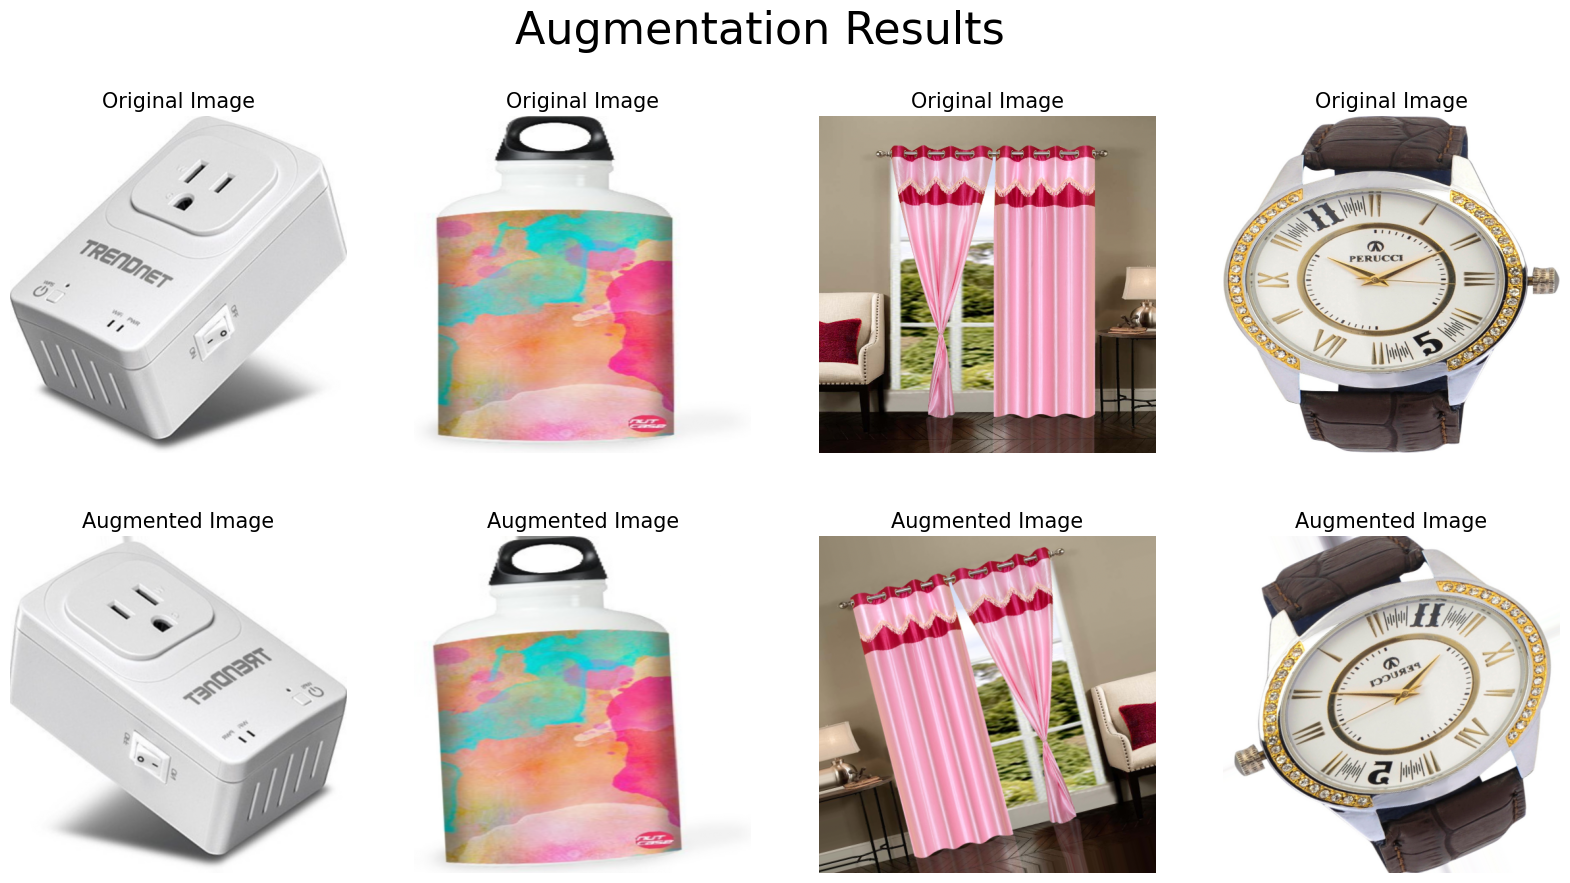

In [96]:
#  4 échantillons améliorés
fig, axs = plt.subplots(2, 4, figsize=(20,10))  
fig.suptitle('Augmentation Results', size=32)

for axs_col, img in enumerate(images_samples):
    viz_transoform_params = {  # defined each iteration to get new augmentation values each time
        'theta': np.random.randint(-transform_params['rotation_range'], transform_params['rotation_range']),
        'tx': np.random.uniform(0, transform_params['width_shift_range']),
        'ty': np.random.uniform(0, transform_params['height_shift_range']),
        'flip_horizontal': np.random.choice([True, False], p=[0.5, 0.5])
    }

    aug_img = img_gen.apply_transform(img, viz_transoform_params)  # the same image after augmentation
    
    axs[0, axs_col].imshow(img);
    axs[0, axs_col].axis('off')
    axs[0, axs_col].set_title('Original Image', size=15)
    
    axs[1, axs_col].imshow(aug_img);
    axs[1, axs_col].axis('off')
    axs[1, axs_col].set_title('Augmented Image', size=15)

In [97]:
# Feature extraction using Transfer learning CNN algorithm
def load_transfer_learning_picture(picture, target_size):
    '''This function loads and returns a resized picture.'''
    # Loading and resizing the picture
    image = load_img(picture, target_size=target_size)

    # Converting the image pixels to a NumPy array
    image = img_to_array(image)
    
    # Reshape input data
    image = np.expand_dims(image, axis=0)
    return image

#### ResNet101

In [98]:
# The different feature extraction approaches
image_models = []
image_ari = []

In [99]:
# ResNet101 model
# Loading the pre-trained ResNet101 model
# Instantiate a base model with pre-trained weights
resnet101_model = ResNet101(
    # Whether to include the fully-connected layer
    # at the top of the network
    # The output layer fully connected of the model is removed
    include_top=False,
    # Load weights pre-trained on ImageNet
    weights='imagenet',
    # Optional Keras tensor to use as image input for the model
    input_tensor=None,
    # Optional shape tuple
    # only to be specified if include_top is False
    input_shape=(224, 224, 3),
    # Optional pooling mode for feature extraction
    # when include_top is False
    pooling='max',
    # Optional number of classes to classify images into
    # only to be specified if include_top is True
    classes=1000)
resnet101_model.summary()

Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                          

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                                                  
 conv4_block8_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block7_out[0][0]']       
                                                                                                  
 conv4_block8_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block8_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block8_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block8_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block8_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block8_1_relu[0][0]']    
          

                                )                                                                 
                                                                                                  
 conv4_block11_1_conv (Conv2D)  (None, 14, 14, 256)  262400      ['conv4_block10_out[0][0]']      
                                                                                                  
 conv4_block11_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block11_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block11_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block11_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_blo

 conv4_block13_out (Activation)  (None, 14, 14, 1024  0          ['conv4_block13_add[0][0]']      
                                )                                                                 
                                                                                                  
 conv4_block14_1_conv (Conv2D)  (None, 14, 14, 256)  262400      ['conv4_block13_out[0][0]']      
                                                                                                  
 conv4_block14_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block14_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block14_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block14_1_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv4_block16_out (Activation)  (None, 14, 14, 1024  0          ['conv4_block16_add[0][0]']      
                                )                                                                 
                                                                                                  
 conv4_block17_1_conv (Conv2D)  (None, 14, 14, 256)  262400      ['conv4_block16_out[0][0]']      
                                                                                                  
 conv4_block17_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block17_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block17_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block17_1_bn[0][0]']     
 on)      

                                )                                 'conv4_block19_3_bn[0][0]']     
                                                                                                  
 conv4_block19_out (Activation)  (None, 14, 14, 1024  0          ['conv4_block19_add[0][0]']      
                                )                                                                 
                                                                                                  
 conv4_block20_1_conv (Conv2D)  (None, 14, 14, 256)  262400      ['conv4_block19_out[0][0]']      
                                                                                                  
 conv4_block20_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block20_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_blo

 conv4_block22_add (Add)        (None, 14, 14, 1024  0           ['conv4_block21_out[0][0]',      
                                )                                 'conv4_block22_3_bn[0][0]']     
                                                                                                  
 conv4_block22_out (Activation)  (None, 14, 14, 1024  0          ['conv4_block22_add[0][0]']      
                                )                                                                 
                                                                                                  
 conv4_block23_1_conv (Conv2D)  (None, 14, 14, 256)  262400      ['conv4_block22_out[0][0]']      
                                                                                                  
 conv4_block23_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block23_1_conv[0][0]']   
 lization)                                                                                        
          

 conv5_block2_3_bn (BatchNormal  (None, 7, 7, 2048)  8192        ['conv5_block2_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_add (Add)         (None, 7, 7, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_bn[0][0]']      
                                                                                                  
 conv5_block2_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block2_add[0][0]']       
                                                                                                  
 conv5_block3_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block2_out[0][0]']       
                                                                                                  
 conv5_blo

In [100]:
# Using the model to extract features
start_time = time.time()
resnet101_features = []
for uniq_id in df.index:
    # Loading and resizing the picture
    image = load_transfer_learning_picture(train_dir + df['filepaths'][uniq_id], (224, 224))
    
    # Preprocessing: normalizing input data
    image = tf.keras.applications.resnet.preprocess_input(image)

    # Get features
    features = resnet101_model.predict(image) 
    resnet101_features.append(features.flatten())
resnet101_features = np.array(resnet101_features)
duration = time.time() - start_time
clear_output(wait=True)
print("ResNet101 model processing time: {:.1f} seconds".format(duration))
print(resnet101_features.shape)

ResNet101 model processing time: 161.2 seconds
(1050, 2048)



Dataset dimensions before PCA: (1050, 2048)
Dataset dimensions after PCA: (1050, 899)
Processing time: 7.4 seconds
ARI: 0.466


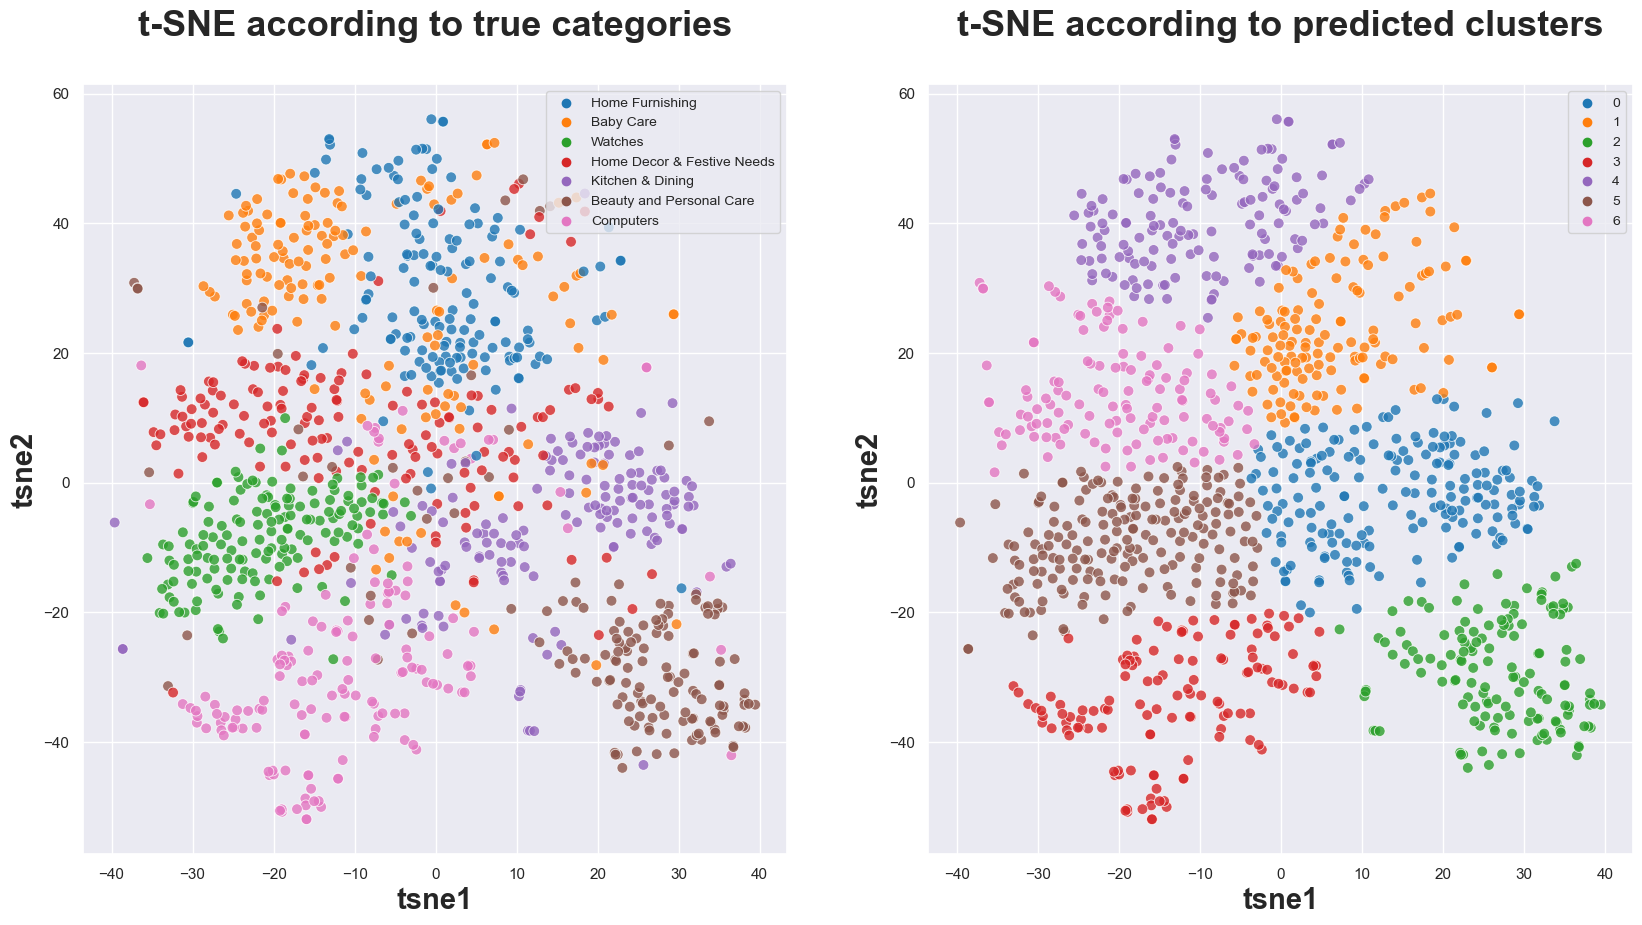

ARI: 0.466
cluster
0    184
1    141
2    140
3    128
4    138
5    194
6    125
Name: label, dtype: int64


In [101]:
# Number of clusters is the number of labels
N_CLASS=df['labels'].nunique()
labels=df['labels']
# Dimensionality reduction and clustering
ARI, X_tsne, pred_labels = apply_clustering(data=resnet101_features,
                                            perplexity=30,
                                            N_CLUST=N_CLASS,
                                            apply_pca=True)
image_models.append('CNN-ResNet101')
image_ari.append(ARI)

# Displaying metric, true categories and clusters
display_clustering(X_tsne, labels, pred_labels, ARI)

#### ResNet50

In [102]:
# ResNet50 model
# Loading the ResNet50 model
# Instantiate a base model with pre-trained weights
resnet50_model = ResNet50(
    # Whether to include the fully-connected layer
    # at the top of the network
    include_top=False,
    # Load weights pre-trained on ImageNet
    weights='imagenet',
    # Optional Keras tensor to use as image input for the model
    input_tensor=None,
    # Optional shape tuple
    # only to be specified if include_top is False    
    input_shape=(224, 224, 3),
    # Optional pooling mode for feature extraction
    # when include_top is False
    pooling='max',
    # Optional number of classes to classify images into
    # only to be specified if include_top is True
    classes=1000)
resnet50_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [103]:
# Using the model to extract features
start_time = time.time()
resnet50_features = []
for uniq_id in df.index:
    # Loading and resizing the picture
    image = load_transfer_learning_picture(train_dir + df['filepaths'][uniq_id], (224, 224))
    
    # Preprocessing: normalizing input data
    image = tf.keras.applications.resnet.preprocess_input(image)

    # Get features
    features = resnet50_model.predict(image) 
    resnet50_features.append(features.flatten())
resnet50_features = np.array(resnet50_features)
duration = time.time() - start_time
clear_output(wait=True)
print("ResNet50 model processing time: {:.1f} seconds".format(duration))
print(resnet50_features.shape)

ResNet50 model processing time: 128.2 seconds
(1050, 2048)



Dataset dimensions before PCA: (1050, 2048)
Dataset dimensions after PCA: (1050, 898)
Processing time: 7.5 seconds
ARI: 0.408


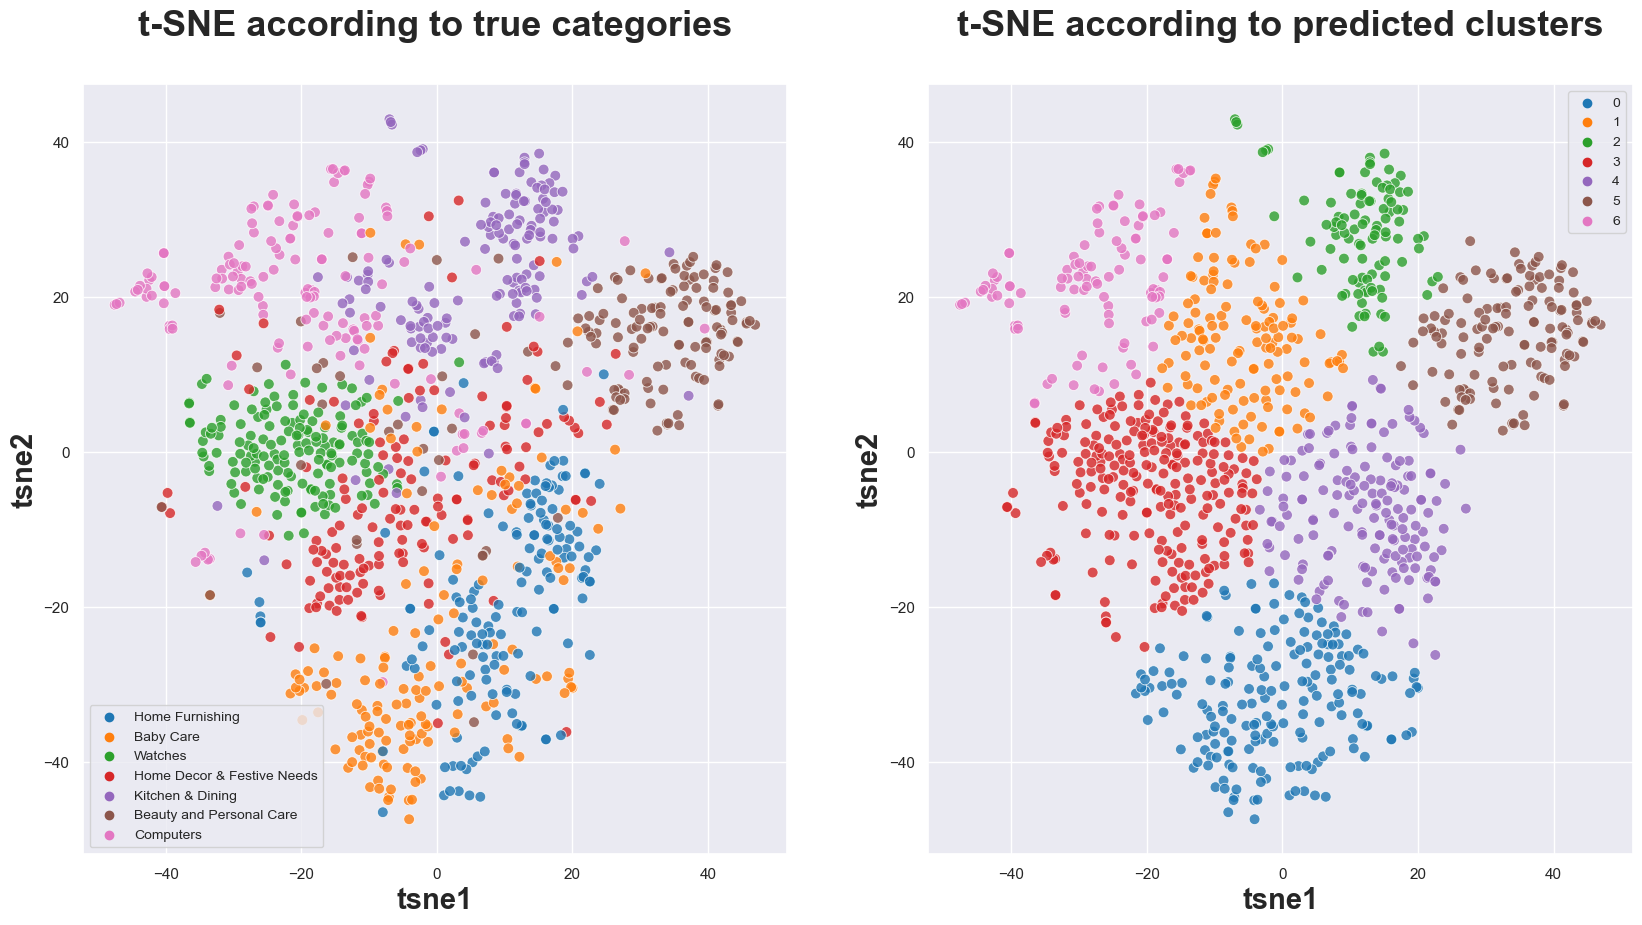

ARI: 0.408
cluster
0    181
1    136
2    101
3    233
4    162
5    131
6    106
Name: label, dtype: int64


In [104]:
# Dimensionality reduction and clustering
ARI, X_tsne, pred_labels = apply_clustering(data=resnet50_features,
                                            perplexity=30,
                                            N_CLUST=N_CLASS,
                                            apply_pca=True)
image_models.append('CNN-ResNet50')
image_ari.append(ARI)

# Displaying metric, true categories and clusters
display_clustering(X_tsne, labels, pred_labels, ARI)

#### VGG16

In [105]:
# ResNet101 model
# Loading the pre-trained ResNet101 model
# Instantiate a base model with pre-trained weights
VGG16_model = VGG16(
    # Whether to include the fully-connected layer
    # at the top of the network
    # The output layer fully connected of the model is removed
    include_top=False,
    # Load weights pre-trained on ImageNet
    weights='imagenet',
    # Optional Keras tensor to use as image input for the model
    input_tensor=None,
    # Optional shape tuple
    # only to be specified if include_top is False
    input_shape=(224, 224, 3),
    # Optional pooling mode for feature extraction
    # when include_top is False
    pooling='max',
    # Optional number of classes to classify images into
    # only to be specified if include_top is True
    classes=1000)
VGG16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [106]:
# Using the model to extract features
start_time = time.time()
VGG16_features = []
for uniq_id in df.index:
    # Loading and resizing the picture
    image = load_transfer_learning_picture(train_dir + df['filepaths'][uniq_id], (224, 224))
    
    # Preprocessing: normalizing input data
    image = preprocess_input(image)

    # Get features
    features = VGG16_model.predict(image) 
    VGG16_features.append(features.flatten())
VGG16_features = np.array(VGG16_features)
duration = time.time() - start_time
clear_output(wait=True)
print("VGG16 model processing time: {:.1f} seconds".format(duration))
print(VGG16_features.shape)

VGG16 model processing time: 135.1 seconds
(1050, 512)



Dataset dimensions before PCA: (1050, 512)
Dataset dimensions after PCA: (1050, 452)
Processing time: 5.6 seconds
ARI: 0.491


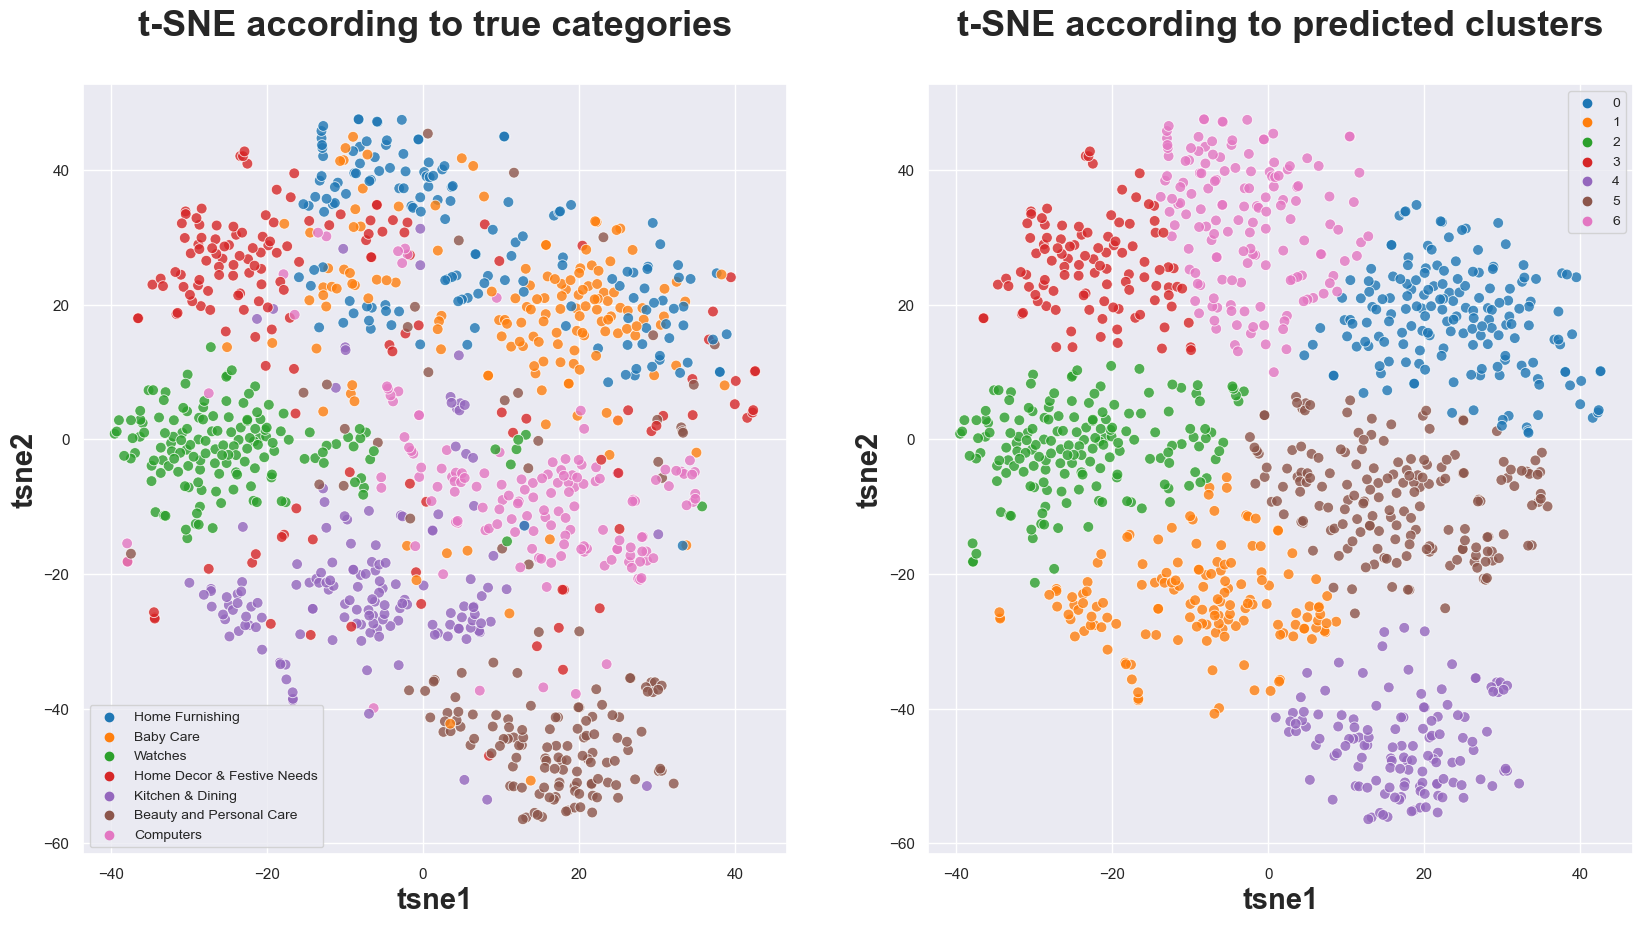

ARI: 0.491
cluster
0    172
1    147
2    171
3    106
4    129
5    176
6    149
Name: label, dtype: int64


In [107]:
# Number of clusters is the number of labels
N_CLASS=df['labels'].nunique()
labels=df['labels']
# Dimensionality reduction and clustering
ARI, X_tsne, pred_labels = apply_clustering(data=VGG16_features,
                                            perplexity=30,
                                            N_CLUST=N_CLASS,
                                            apply_pca=True)
image_models.append('CNN-VGG16')
image_ari.append(ARI)

# Displaying metric, true categories and clusters
display_clustering(X_tsne, labels, pred_labels, ARI)

#### resultats TL

In [108]:
# Classification of the different feature extraction approaches
image_classification = pd.DataFrame(columns=['Model', 'ARI'])
image_classification['Model'] = image_models
image_classification['ARI'] = np.round(image_ari, 3)
image_classification = image_classification.sort_values(['ARI'],
                                                        ascending=False)
image_classification.reset_index(inplace=True, drop=True)
image_classification

Model    ARI
0      CNN-VGG16  0.491
1  CNN-ResNet101  0.466
2   CNN-ResNet50  0.408

In [109]:
VGG16_features = pd.DataFrame(VGG16_features)
VGG16_features.to_csv("VGG16_features.csv")

# ################################################################

# 3-Analyse texte + image

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import (preprocessing, cluster, metrics,
                     manifold, decomposition)
import time

In [111]:
#data = pd.read_csv("temp1050.csv", encoding='utf-8',index_col = 0)
data = data1[['uniq_id','product_category_tree','image']].copy()
data.rename(columns = {'image':'image_path', 'product_category_tree':'label_name'}, inplace = True)
print(data.shape)
data.head()

(1050, 3)


uniq_id       label_name  \
0  55b85ea15a1536d46b7190ad6fff8ce7  Home Furnishing   
1  7b72c92c2f6c40268628ec5f14c6d590        Baby Care   
2  64d5d4a258243731dc7bbb1eef49ad74        Baby Care   
3  d4684dcdc759dd9cdf41504698d737d8  Home Furnishing   
4  6325b6870c54cd47be6ebfbffa620ec7  Home Furnishing   

                             image_path  
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg  
1  7b72c92c2f6c40268628ec5f14c6d590.jpg  
2  64d5d4a258243731dc7bbb1eef49ad74.jpg  
3  d4684dcdc759dd9cdf41504698d737d8.jpg  
4  6325b6870c54cd47be6ebfbffa620ec7.jpg

In [112]:
list_labels = list(set(data["label_name"]))

le = preprocessing.LabelEncoder()
data["label"] = le.fit_transform(data["label_name"])

data

uniq_id       label_name  \
0     55b85ea15a1536d46b7190ad6fff8ce7  Home Furnishing   
1     7b72c92c2f6c40268628ec5f14c6d590        Baby Care   
2     64d5d4a258243731dc7bbb1eef49ad74        Baby Care   
3     d4684dcdc759dd9cdf41504698d737d8  Home Furnishing   
4     6325b6870c54cd47be6ebfbffa620ec7  Home Furnishing   
...                                ...              ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc        Baby Care   
1046  fd6cbcc22efb6b761bd564c28928483c        Baby Care   
1047  5912e037d12774bb73a2048f35a00009        Baby Care   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6        Baby Care   
1049  f2f027ad6a6df617c9f125173da71e44        Baby Care   

                                image_path  label  
0     55b85ea15a1536d46b7190ad6fff8ce7.jpg      4  
1     7b72c92c2f6c40268628ec5f14c6d590.jpg      0  
2     64d5d4a258243731dc7bbb1eef49ad74.jpg      0  
3     d4684dcdc759dd9cdf41504698d737d8.jpg      4  
4     6325b6870c54cd47be6ebfbffa620ec7.jpg      4  
...                                    ...    ...  
1045  958f54f4c46b53c8a0a9b8167d9140bc.jpg      0  
1046  fd6cbcc22efb6b761bd564c28928483c.jpg      0  
1047  5912e037d12774bb73a2048f35a00009.jpg      0  
1048  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg      0  
1049  f2f027ad6a6df617c9f125173da71e44.jpg      0  

[1050 rows x 4 columns]

In [113]:
VGG16_features = pd.read_csv("VGG16_features.csv", encoding='utf-8',index_col = 0)
print(VGG16_features.shape)
VGG16_features.head()

(1050, 512)


0          1          2         3          4    5          6  \
0   0.000000   3.912024  12.971652  0.000000  27.050964  0.0  69.182365   
1  12.480305  13.897768   0.000000  0.000000   0.000000  0.0  24.201908   
2   0.000000   0.000000   0.000000  0.000000   3.357434  0.0  98.277020   
3  56.400540   0.000000   6.972720  9.201708   0.000000  0.0  19.886972   
4   0.000000  25.861690  10.680903  0.000000  26.479029  0.0  25.972483   

           7    8          9  ...         502         503        504  \
0   0.000000  0.0  14.738047  ...    0.000000   85.124985   5.680946   
1   0.000000  0.0  45.495754  ...  121.454950   78.525460   0.000000   
2   0.000000  0.0  10.200748  ...    5.381841   54.533170  31.790457   
3  64.839260  0.0   0.000000  ...   49.848610   81.103615   0.000000   
4   6.495335  0.0   0.000000  ...   33.874490  189.588910   9.812616   

          505         506        507         508        509        510  \
0   62.914085   50.239685  33.465508   34.025450  52.886196   0.000000   
1  203.873810   96.799675   3.131699  208.494190  53.487263  39.422356   
2   66.872040  139.886170  13.718390   69.929436  17.389591   0.000000   
3   67.875950  135.041240  57.882095  119.542175  18.223198  61.234592   
4   39.874080  112.771470  38.942116  118.637215  21.749058  52.979473   

         511  
0  26.435429  
1   0.000000  
2   0.000000  
3   0.466436  
4   0.000000  

[5 rows x 512 columns]

In [114]:
use_df = pd.read_csv("use_df.csv", encoding='utf-8',index_col = 0)
print(use_df.shape)
use_df.head()

(1050, 512)


0         1         2         3         4         5         6  \
0 -0.055396 -0.027823  0.018332  0.047501  0.030964  0.050779 -0.050235   
1 -0.051229 -0.018987  0.012277  0.022975  0.057922  0.060340  0.057083   
2 -0.058108  0.021526 -0.044110  0.054895  0.056038  0.057703  0.049468   
3 -0.055462 -0.053695  0.045225  0.053005  0.055401  0.048386  0.021238   
4 -0.054780 -0.036940  0.040255  0.050871  0.054735  0.052953 -0.024609   

          7         8         9  ...       502       503       504       505  \
0  0.057108 -0.020648 -0.008976  ... -0.047926 -0.059112 -0.055888  0.048982   
1 -0.022221 -0.047319 -0.047699  ...  0.031741 -0.059948 -0.054229 -0.056525   
2  0.046216 -0.023052  0.003306  ...  0.055064 -0.058256 -0.049101 -0.004939   
3  0.029411 -0.022994 -0.052559  ... -0.026728 -0.055632 -0.005892  0.020955   
4  0.049979  0.034675 -0.050614  ...  0.001154 -0.054917 -0.051271 -0.022695   

        506       507       508       509       510       511  
0 -0.007596 -0.042388  0.027310  0.050864  0.049180 -0.015309  
1 -0.019069 -0.052220 -0.005158  0.033082  0.031539  0.034636  
2  0.008639 -0.042966  0.045987  0.057753 -0.050773 -0.047263  
3 -0.052571 -0.031698  0.053748  0.053796 -0.022064 -0.054438  
4 -0.054123 -0.043779  0.054636  0.054836 -0.024710 -0.053383  

[5 rows x 512 columns]

In [115]:
# Fonctions utilisés pour le clustering
def apply_clustering(data, perplexity, N_CLUST, apply_pca):
    '''This function applies PCA or TruncatedSVD, t-SNE, clustering
    and calculates ARI of true labels and predicted labels.
    '''
    start_time = time.time()
    
    # Applying the PCA
    if apply_pca is True:
        # Normalization
        transformer = preprocessing.QuantileTransformer(
            output_distribution='normal',
            random_state=0)
        data = transformer.fit_transform(data)

        # Standardization
        scaler = preprocessing.StandardScaler()
        data = scaler.fit_transform(data)
    
        # Using PCA to select decorrelated features for dense matrix
        print("\nDataset dimensions before PCA: {}".format(data.shape))
        pca = decomposition.PCA(n_components=0.99)
        data = pca.fit_transform(data)
        print("Dataset dimensions after PCA: {}".format(data.shape))

    # Applying t-SNE
    tsne = manifold.TSNE(
        # Dimension of the embedded space
        n_components=2,
        # The perplexity is related to the number of nearest neighbors
        # that is used in other manifold learning algorithms
        perplexity=perplexity,
        # Maximum number of iterations for the optimization
        n_iter=2000,
        # Initialization of embedding
        init='pca',
        # The learning rate for t-SNE is usually in the range [10, 1000]
        learning_rate=200,
        # The number of parallel jobs to run for neighbors search
        n_jobs=-1,
        # Determines the random number generator
        random_state=0)
    X_tsne = tsne.fit_transform(data)
    
    kmeans = cluster.KMeans(
        # The number of clusters and
        # the number of centroids to generate
        n_clusters=N_CLUST,
        # Method for initialization: selects initial cluster centers
        # for k-mean clustering in a smart way to speed up convergence
        init='k-means++',
        # Number of time the k-means algorithm will be run
        # with different centroid seeds
        n_init=100,
        # Determines random number generation
        # for centroid initialization
        random_state=0)
    kmeans.fit(X_tsne)
    
    # ARI calculation
    ARI = metrics.adjusted_rand_score(labels, kmeans.labels_)
    duration = time.time() - start_time
    print("Processing time: {:.1f} seconds".format(duration))
    print("ARI: {:.3f}".format(ARI))
    return ARI, X_tsne, kmeans.labels_


def display_clustering(X_tsne, categories, pred_labels, ARI):
    '''This function displays t-SNE according to categories and clusters.'''
    tsne_df = pd.DataFrame(X_tsne[:, 0:2],
                       columns=['tsne1', 'tsne2'])
    tsne_df['label']= categories
    tsne_df['cluster'] = list(pred_labels)
    N_CLASS = len(np.unique(list(tsne_df['label'])))
    
    # Set seaborn plotting aesthetics as default
    sns.set()
    
    # Define plotting region (1 row, 2 columns)
    fig, axes = plt.subplots(1, 2, figsize=(20, 10))
    sns.scatterplot(
        data=tsne_df,
        x='tsne1',
        y='tsne2',
        hue='label',
        palette=sns.color_palette('tab10', n_colors=N_CLASS),
        s=60,
        alpha=0.8,
        ax=axes[0],
        legend='brief')
    axes[0].set_title('t-SNE according to true categories',
                      fontsize=26,
                      pad=35,
                      fontweight='bold')
    axes[0].set_xlabel('tsne1',
                       fontsize=21,
                       fontweight='bold')
    axes[0].set_ylabel('tsne2',
                       fontsize=21,
                       fontweight='bold')
    axes[0].legend(prop={'size': 10})
    sns.scatterplot(
        data=tsne_df,
        x='tsne1',
        y='tsne2',
        hue='cluster',
        palette=sns.color_palette('tab10', n_colors=N_CLASS),
        s=60,
        alpha=0.8,
        ax=axes[1],
        legend='brief')
    axes[1].set_title('t-SNE according to predicted clusters',
                      fontsize=26,
                      pad=35,
                      fontweight='bold')
    axes[1].set_xlabel('tsne1',
                       fontsize=21,
                       fontweight='bold')
    axes[1].set_ylabel('tsne2',
                       fontsize=21,
                       fontweight='bold')
    axes[1].legend(prop={'size': 10})
    plt.show()
    print("ARI: {:.3f}".format(ARI))
    print(tsne_df.groupby('cluster').count()['label'])
    

In [116]:
data_f = pd.concat([VGG16_features, use_df], axis=1)
data_f.shape

(1050, 1024)

In [117]:
# The different feature extraction approaches
image_models = []
image_ari = []


Dataset dimensions before PCA: (1050, 1024)
Dataset dimensions after PCA: (1050, 623)
Processing time: 6.3 seconds
ARI: 0.441


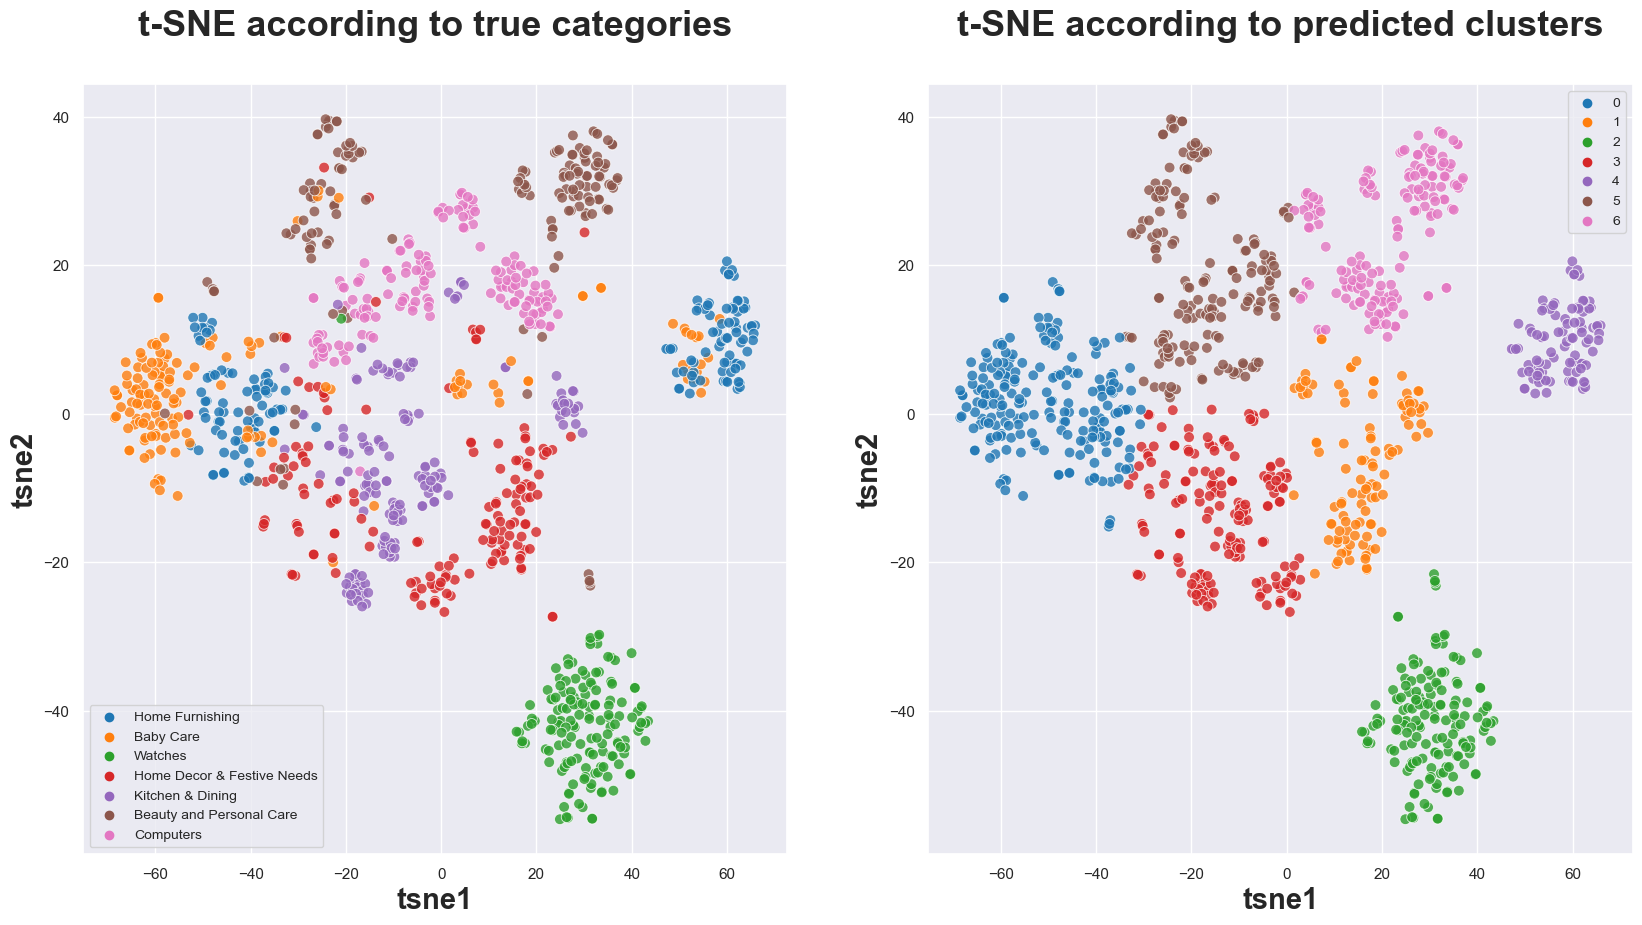

ARI: 0.441
cluster
0    204
1    105
2    155
3    164
4     90
5    169
6    163
Name: label, dtype: int64


In [118]:
# Number of clusters is the number of labels
N_CLASS=data['label_name'].nunique()
labels=data['label_name']

# Dimensionality reduction and clustering
ARI, X_tsne, pred_labels = apply_clustering(data=data_f,
                                            perplexity=30,
                                            N_CLUST=N_CLASS,
                                            apply_pca=True)
image_models.append('VGG16_USE')
image_ari.append(ARI)

# Displaying metric, true categories and clusters
display_clustering(X_tsne, labels, pred_labels, ARI)